# DATA CLEANING & EDA

## Crude Oil Dataset Description

The dataset consists of **114 crude oil blends**. Each crude assay provides a detailed characterization of the crude’s physical, chemical, and distillation-based properties.

### 1. Independent Variables (Features)
These variables represent the input data used to characterize the crude oil blends.

| Category | Variable Name | Unit | Description |
| :--- | :--- | :--- | :--- |
| **Bulk Physical & Chemical** | `StdLiquidDensity` | kg/m³ | Standard liquid density of the crude. |
| | `SulfurByWt` | % | Total sulfur content by weight. |
| | `ConradsonCarbonByWt` | % | Carbon residue remaining after evaporation/pyrolysis. |
| | `NitrogenByWt` | % | Total nitrogen content by weight. |
| **Distillation Curve (TBP)** | **TBP Cut Points** | °C / °F | The temperature at which specific volume percentages boil off. |
| | *Fractions* | | 1%, 5%, 10%, 30%, 50%, 70%, 90%, 95%, 99% |

### 2. Target Variables (Outputs)
These are the properties targeted for prediction based on the independent variables.

#### 2.1 Set 1: Hydrocarbon Composition
| Variable Name | Description | Unit |
| :--- | :--- | :--- |
| `AromByWt` | Aromatics content by weight | % |
| `NaphthenesByWt` | Naphthenes content by weight | % |
| `ParaffinsByWt` | Paraffins content by weight | % |

#### 2.2 Set 2: Kinematic Viscosity (Primary Targets)
| Variable Name | Condition | Unit |
| :--- | :--- | :--- |
| `KinematicViscosity` | @ 37.78°C (100°F) | cSt |
| `KinematicViscosity` | @ 98.89°C (210°F) | cSt |

#### 2.3 Set 3: Secondary Quality Specifications
| Variable Name | Description | Unit |
| :--- | :--- | :--- |
| `CetaneNumber` | Ignition quality indicator for diesel fuel fractions | Unitless |
| `BromineNumber` | Measure of aliphatic unsaturation (chemical instability) | g Br2/100g |
| `AnilinePoint` | Indicates aromatic content; lower values mean higher aromatics | o C |
| `FreezePoint` | Lowest temperature before hydrocarbon crystals form | o C |
| `PourPoint` | Lowest temperature at which the oil remains fluid | o C |
| `CloudPoint` | Temperature at which wax crystals first appear (haze) | o C |
| `TotalAcidNumber` | Measure of acidity/corrosivity (Naphthenic Acid content) | mg KOH/g |
| `CtoHRatioByWt` | Carbon-to-Hydrogen weight ratio (energy density indicator) | Ratio |

### 1. Import Data and Required Packages
####  1.1 Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [33]:
#Importing Packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Importing Extracted Data from 53 Crude Assays

In [34]:
#Importing CSV data as Pandas dataframe
df=pd.read_csv('dataset/Extracted_CrudeData.csv')

### 2. Dataset Description

In [35]:
#Show top 5 rows of the dataframe
df.head()

Crude Name  StdLiquidDensity (kg/m3)  SulfurByWt (%)  \
0  Achinsk-2015                926.440713       24.606786   
1     Akpo-2014                794.689603        0.070591   
2   AlJurf-2014                874.431106        1.826957   
3   AlJurf-2015                872.972557        1.840926   
4     Alba-1994                937.762899        1.322111   

   ConradsonCarbonByWt (%)  NitrogenByWt (%)  \
0                 5.827369          0.209874   
1                 0.732083          0.062825   
2                 5.241924          0.168953   
3                 5.365742          0.146255   
4                 5.847739          0.196515   

   Distillation Mass @ X Pct (C)@ 1 (%) - TBP  \
0                                  -17.813183   
1                                  -16.244551   
2                                   26.236785   
3                                   26.408162   
4                                  159.292817   

   Distillation Mass @ X Pct (C)@ 5 (%) - TBP  \
0                                   99.504433   
1                                   24.679712   
2                                   98.856864   
3                                   96.128866   
4                                  225.625562   

   Distillation Mass @ X Pct (C)@ 10 (%) - TBP  \
0                                   239.896662   
1                                    74.031996   
2                                   138.763063   
3                                   135.041586   
4                                   264.407311   

   Distillation Mass @ X Pct (C)@ 30 (%) - TBP  \
0                                   398.590562   
1                                   147.692242   
2                                   251.728374   
3                                   248.512058   
4                                   363.170601   

   Distillation Mass @ X Pct (C)@ 50 (%) - TBP  ...  \
0                                   481.984170  ...   
1                                   231.447841  ...   
2                                   354.117493  ...   
3                                   351.412080  ...   
4                                   470.497570  ...   

   KinematicViscosity (cSt)@ 37.78 (C)  KinematicViscosity (cSt)@ 98.89 (C)  \
0                     57.2992918615153                     7.64442822441154   
1                      1.7573028543796                    0.833437569080932   
2                     7.05914911333451                     2.02549206169594   
3                     6.77137102006056                     2.01032962388146   
4                     208.950655083803                      7.7853062269412   

   CetaneNumber  BromineNumber  AnilinePoint (C)  FreezePoint (C)  \
0     50.267061            NaN         65.639336       108.476408   
1     48.034358            NaN         10.907278       -32.769863   
2     53.504942            NaN         40.198516         5.823258   
3     54.213282            NaN         39.958106        18.377083   
4     57.443852            NaN         76.496875         1.073170   

   PourPoint (C) CloudPoint (C) TotalAcidNumber (mg KOH/g)  CtoHRatioByWt  
0      31.114131      35.355448                   0.121042       7.220029  
1      13.927943      20.861818                   0.080432       5.829529  
2      25.601385      31.622843                   0.055671       6.654117  
3      27.135976      32.684943                   0.028494       6.658939  
4      13.930097      40.746252                   1.127930       7.499064  

[5 rows x 27 columns]

In [36]:
#Shape of dataset
df.shape

(114, 27)

There are 114 columns and 24 rows

#### Renaming Columns

In [37]:
#Renaming columns
df.rename(columns={
    'Crude Name': 'Crude_Name',
    'StdLiquidDensity (kg/m3)': 'StdLiqDensity_kgm3',
    'SulfurByWt (%)': 'SulfurWt_pct',
    'ConradsonCarbonByWt (%)': 'ConradsonCarbon_wt_pct',
    'NitrogenByWt (%)': 'NitrogenWt_pct',
    
    'Distillation Mass @ X Pct (C)@ 1 (%) - TBP': 'TBP_TempAt_1pct',
    'Distillation Mass @ X Pct (C)@ 5 (%) - TBP': 'TBP_TempAt_5pct',
    'Distillation Mass @ X Pct (C)@ 10 (%) - TBP': 'TBP_TempAt_10pct',
    'Distillation Mass @ X Pct (C)@ 30 (%) - TBP': 'TBP_TempAt_30pct',
    'Distillation Mass @ X Pct (C)@ 50 (%) - TBP': 'TBP_TempAt_50pct',
    'Distillation Mass @ X Pct (C)@ 70 (%) - TBP': 'TBP_TempAt_70pct',
    'Distillation Mass @ X Pct (C)@ 90 (%) - TBP': 'TBP_TempAt_90pct',
    'Distillation Mass @ X Pct (C)@ 95 (%) - TBP': 'TBP_TempAt_95pct',
    'Distillation Mass @ X Pct (C)@ 99 (%) - TBP': 'TBP_TempAt_99pct',

    'AromByWt (%)': 'AromWt_pct',
    'NaphthenesByWt (%)': 'NaphWt_pct',
    'ParaffinsByWt (%)': 'ParaWt_pct',

    'KinematicViscosity (cSt)@ 37.78 (C)': 'KV_37.78c_cSt',
    'KinematicViscosity (cSt)@ 98.89 (C)': 'KV_98.89c_cSt',

    "CetaneNumber": "CetaneNumber",
    "BromineNumber": "BromineNumber",
    "AnilinePoint (C)": "AnilinePoint",
    "FreezePoint (C)": "FreezePoint",
    "PourPoint (C)": "PourPoint",
    "CloudPoint (C)": "CloudPoint",
    "TotalAcidNumber (mg KOH/g)": "TotalAcidNumber",
    "CtoHRatioByWt": "CtoHRatioByWt"
}, inplace=True)
df.head()


Crude_Name  StdLiqDensity_kgm3  SulfurWt_pct  ConradsonCarbon_wt_pct  \
0  Achinsk-2015          926.440713     24.606786                5.827369   
1     Akpo-2014          794.689603      0.070591                0.732083   
2   AlJurf-2014          874.431106      1.826957                5.241924   
3   AlJurf-2015          872.972557      1.840926                5.365742   
4     Alba-1994          937.762899      1.322111                5.847739   

   NitrogenWt_pct  TBP_TempAt_1pct  TBP_TempAt_5pct  TBP_TempAt_10pct  \
0        0.209874       -17.813183        99.504433        239.896662   
1        0.062825       -16.244551        24.679712         74.031996   
2        0.168953        26.236785        98.856864        138.763063   
3        0.146255        26.408162        96.128866        135.041586   
4        0.196515       159.292817       225.625562        264.407311   

   TBP_TempAt_30pct  TBP_TempAt_50pct  ...     KV_37.78c_cSt  \
0        398.590562        481.984170  ...  57.2992918615153   
1        147.692242        231.447841  ...   1.7573028543796   
2        251.728374        354.117493  ...  7.05914911333451   
3        248.512058        351.412080  ...  6.77137102006056   
4        363.170601        470.497570  ...  208.950655083803   

       KV_98.89c_cSt  CetaneNumber  BromineNumber  AnilinePoint  FreezePoint  \
0   7.64442822441154     50.267061            NaN     65.639336   108.476408   
1  0.833437569080932     48.034358            NaN     10.907278   -32.769863   
2   2.02549206169594     53.504942            NaN     40.198516     5.823258   
3   2.01032962388146     54.213282            NaN     39.958106    18.377083   
4    7.7853062269412     57.443852            NaN     76.496875     1.073170   

   PourPoint CloudPoint TotalAcidNumber  CtoHRatioByWt  
0  31.114131  35.355448        0.121042       7.220029  
1  13.927943  20.861818        0.080432       5.829529  
2  25.601385  31.622843        0.055671       6.654117  
3  27.135976  32.684943        0.028494       6.658939  
4  13.930097  40.746252        1.127930       7.499064  

[5 rows x 27 columns]

### 3. Data Checks
#### 3.1 Check for Duplicate Values

In [38]:
#Checks for duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicate values.

#### 3.2 Check for Missing Values

In [39]:
#Checks for missing values
df.isna().sum()

Crude_Name                  0
StdLiqDensity_kgm3          0
SulfurWt_pct                0
ConradsonCarbon_wt_pct      0
NitrogenWt_pct              0
TBP_TempAt_1pct             0
TBP_TempAt_5pct             0
TBP_TempAt_10pct            0
TBP_TempAt_30pct            0
TBP_TempAt_50pct            0
TBP_TempAt_70pct            0
TBP_TempAt_90pct            0
TBP_TempAt_95pct            0
TBP_TempAt_99pct            0
AromWt_pct                  0
NaphWt_pct                  0
ParaWt_pct                  0
KV_37.78c_cSt               0
KV_98.89c_cSt               0
CetaneNumber                0
BromineNumber             114
AnilinePoint                0
FreezePoint                 0
PourPoint                   0
CloudPoint                  0
TotalAcidNumber             0
CtoHRatioByWt               0
dtype: int64

In [40]:
#Deleting columns with more than 50% missing values
df.drop(columns='BromineNumber', inplace=True)
df.shape

(114, 26)

#### 3.3 Check Data Types

In [41]:
#Exploring data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crude_Name              114 non-null    object 
 1   StdLiqDensity_kgm3      114 non-null    float64
 2   SulfurWt_pct            114 non-null    float64
 3   ConradsonCarbon_wt_pct  114 non-null    float64
 4   NitrogenWt_pct          114 non-null    float64
 5   TBP_TempAt_1pct         114 non-null    float64
 6   TBP_TempAt_5pct         114 non-null    float64
 7   TBP_TempAt_10pct        114 non-null    float64
 8   TBP_TempAt_30pct        114 non-null    float64
 9   TBP_TempAt_50pct        114 non-null    float64
 10  TBP_TempAt_70pct        114 non-null    float64
 11  TBP_TempAt_90pct        114 non-null    float64
 12  TBP_TempAt_95pct        114 non-null    float64
 13  TBP_TempAt_99pct        114 non-null    float64
 14  AromWt_pct              114 non-null    fl

The column *KinematicViscosity (cSt)@ 37.78 (C)* shows datatype as object.

In [42]:
#Changing data types
df["KV_37.78c_cSt"] = pd.to_numeric(df["KV_37.78c_cSt"], errors="coerce")
df["KV_98.89c_cSt"] = pd.to_numeric(df["KV_98.89c_cSt"], errors="coerce")

In [43]:
#Numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 25 numerical features : ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct', 'TBP_TempAt_1pct', 'TBP_TempAt_5pct', 'TBP_TempAt_10pct', 'TBP_TempAt_30pct', 'TBP_TempAt_50pct', 'TBP_TempAt_70pct', 'TBP_TempAt_90pct', 'TBP_TempAt_95pct', 'TBP_TempAt_99pct', 'AromWt_pct', 'NaphWt_pct', 'ParaWt_pct', 'KV_37.78c_cSt', 'KV_98.89c_cSt', 'CetaneNumber', 'AnilinePoint', 'FreezePoint', 'PourPoint', 'CloudPoint', 'TotalAcidNumber', 'CtoHRatioByWt']

We have 1 categorical features : ['Crude_Name']


#### 3.4 Check Unique Values

In [44]:
#Check unique values
df.nunique()

Crude_Name                114
StdLiqDensity_kgm3        114
SulfurWt_pct              114
ConradsonCarbon_wt_pct    114
NitrogenWt_pct            111
TBP_TempAt_1pct           114
TBP_TempAt_5pct           114
TBP_TempAt_10pct          114
TBP_TempAt_30pct          114
TBP_TempAt_50pct          114
TBP_TempAt_70pct          114
TBP_TempAt_90pct          114
TBP_TempAt_95pct          114
TBP_TempAt_99pct          114
AromWt_pct                114
NaphWt_pct                114
ParaWt_pct                114
KV_37.78c_cSt             109
KV_98.89c_cSt             112
CetaneNumber              114
AnilinePoint              114
FreezePoint               114
PourPoint                 114
CloudPoint                114
TotalAcidNumber           114
CtoHRatioByWt             114
dtype: int64

#### 3.5 Check Data Statistics

In [45]:
df.describe()

StdLiqDensity_kgm3  SulfurWt_pct  ConradsonCarbon_wt_pct  \
count          114.000000    114.000000              114.000000   
mean           911.183155      2.588554                7.777829   
std             62.270467      3.545317                5.402254   
min            720.475090      0.003066                0.000859   
25%            870.192887      0.389044                4.265128   
50%            928.991186      1.691463                6.770968   
75%            951.802090      3.508104               11.503868   
max           1030.171649     24.606786               28.223030   

       NitrogenWt_pct  TBP_TempAt_1pct  TBP_TempAt_5pct  TBP_TempAt_10pct  \
count      114.000000       114.000000       114.000000        114.000000   
mean         0.249874        56.753527       130.631442        180.238812   
std          0.165850        63.588849        71.754399         80.303087   
min          0.000000       -84.112295        12.470906         33.973020   
25%          0.125091        15.277391        72.923914        114.519203   
50%          0.229044        47.935556       118.746033        183.532131   
75%          0.353490        79.549146       174.645950        237.036776   
max          0.703527       292.828624       385.253498        497.464122   

       TBP_TempAt_30pct  TBP_TempAt_50pct  TBP_TempAt_70pct  ...  ParaWt_pct  \
count        114.000000        114.000000        114.000000  ...  114.000000   
mean         313.718924        426.257724        543.845321  ...   13.283718   
std           98.906679        119.094365        138.646107  ...   11.227181   
min           71.475104        101.998436        121.594913  ...    0.196860   
25%          249.316137        354.567378        469.661796  ...    4.472868   
50%          332.999865        448.591646        554.099607  ...   10.677140   
75%          375.907067        501.895457        624.179194  ...   18.522450   
max          767.378662        956.072090       1115.794740  ...   57.447748   

       KV_37.78c_cSt  KV_98.89c_cSt  CetaneNumber  AnilinePoint  FreezePoint  \
count   1.090000e+02     112.000000    114.000000    114.000000   114.000000   
mean    1.189866e+04      22.049577     49.826537     67.800719    16.047615   
std     1.169141e+05      90.864829      9.446710     22.562567    36.218370   
min     6.871622e-01       0.441290      5.050770     -0.928149   -82.676362   
25%     6.771371e+00       2.088348     44.739298     57.369269    -8.475413   
50%     5.402304e+01       6.729713     50.249102     70.036639    18.334551   
75%     1.695572e+02      12.517947     54.267821     78.242423    33.138388   
max     1.221133e+06     945.937902     83.518233    160.157011   161.779073   

        PourPoint  CloudPoint  TotalAcidNumber  CtoHRatioByWt  
count  114.000000  114.000000       114.000000     114.000000  
mean    19.309891   46.334717         0.744407       8.569052  
std     33.491175   51.624573         0.879719       2.005873  
min    -64.884019  -58.386494         0.007967       5.612392  
25%      4.554760   26.350056         0.133456       7.226006  
50%     17.096004   39.382198         0.403712       7.907018  
75%     31.070315   54.977637         1.039020       9.872377  
max    262.357175  436.042405         4.391369      17.517327  

[8 rows x 25 columns]

#### Data Quality Checks

- Non-negative Property Values
- Monotonic increase of TBP distillation temperatures
- Hydrocarbon composition to approximately 100 wt%

In [46]:
#Columns that must be non-negative
nonnegative_cols = [
    'StdLiqDensity_kgm3',
    'SulfurWt_pct',
    'NitrogenWt_pct',
    'ConradsonCarbon_wt_pct',

    'AromWt_pct',
    'NaphWt_pct',
    'ParaWt_pct',
    
    'CetaneNumber',
    'TotalAcidNumber',
    'CtoHRatioByWt'
]
for col in nonnegative_cols:
    invalid_count = (df[col] < 0).sum()
    print(f"'{col}' = {invalid_count} negative values.") 

'StdLiqDensity_kgm3' = 0 negative values.
'SulfurWt_pct' = 0 negative values.
'NitrogenWt_pct' = 0 negative values.
'ConradsonCarbon_wt_pct' = 0 negative values.
'AromWt_pct' = 0 negative values.
'NaphWt_pct' = 0 negative values.
'ParaWt_pct' = 0 negative values.
'CetaneNumber' = 0 negative values.
'TotalAcidNumber' = 0 negative values.
'CtoHRatioByWt' = 0 negative values.


In [47]:
#Check if any TBP temperature decreases across columns
TBP_cols = [
    'TBP_TempAt_1pct',
    'TBP_TempAt_5pct',
    'TBP_TempAt_10pct',
    'TBP_TempAt_30pct',
    'TBP_TempAt_50pct',
    'TBP_TempAt_70pct',
    'TBP_TempAt_90pct',
    'TBP_TempAt_95pct',
    'TBP_TempAt_99pct'
]

tbp_violations = (df[TBP_cols] < df[TBP_cols].shift(axis=1)).any(axis=1)
print(f"Number of rows with TBP temperature violations",tbp_violations.sum())

Number of rows with TBP temperature violations 0


In [48]:
#Sum of aromatics + naphthenes + paraffins = 100%
df['Composition'] = df[['AromWt_pct', 'NaphWt_pct', 'ParaWt_pct']].sum(axis=1)

#Check outside tolerance (95–105%)
composition_violations = (df['Composition'] < 95) | (df['Composition'] > 105)
print("Composition sum violations:", composition_violations.sum())


Composition sum violations: 0


### 4. Data Visualization


### 4.1 UNIVARIATE ANALYSIS
#### 4.1.1 Histogram with KDE

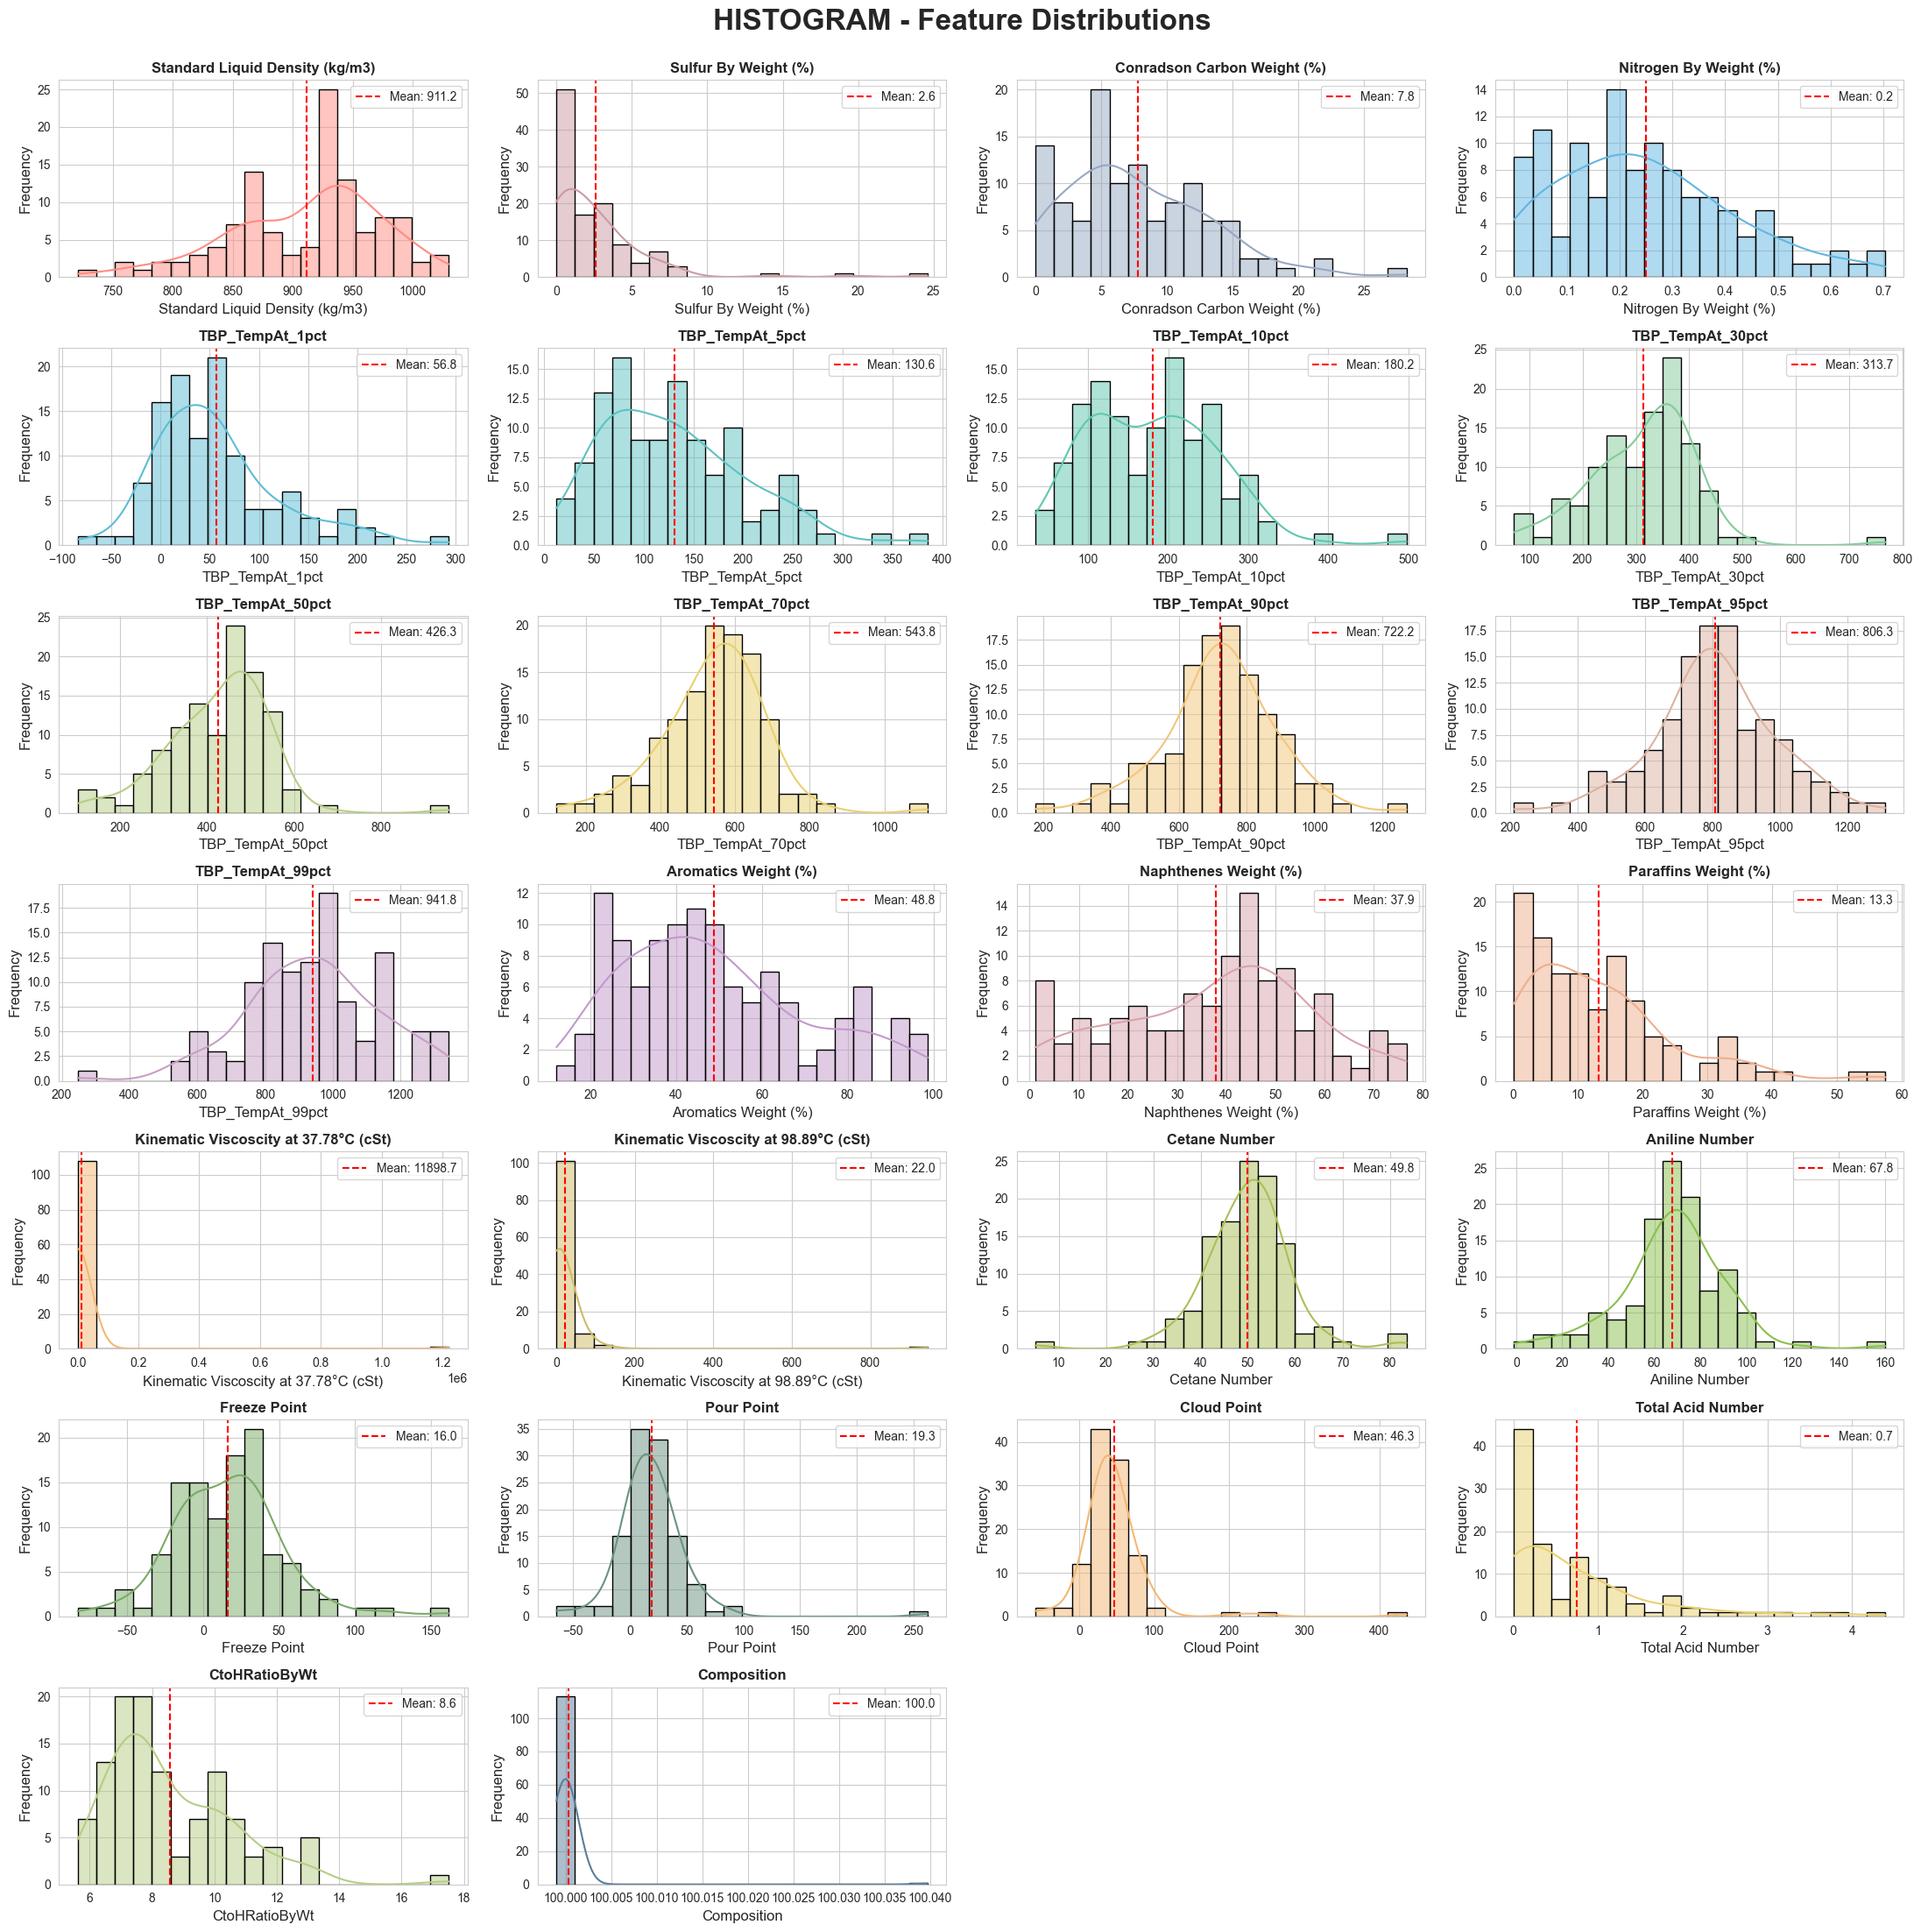

In [49]:
#Plotting Histograms for all features
columns = [
    ('StdLiqDensity_kgm3', '#ff8c82', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', '#cb9aa2', 'Sulfur By Weight (%)'),
    ('ConradsonCarbon_wt_pct', '#97a8c2', 'Conradson Carbon Weight (%)'),
    ('NitrogenWt_pct', '#63b6e1', 'Nitrogen By Weight (%)'),
    ('TBP_TempAt_1pct', '#5dbdd5', 'TBP_TempAt_1pct'),
    ('TBP_TempAt_5pct', '#5ec2c2', 'TBP_TempAt_5pct'),
    ('TBP_TempAt_10pct', '#5fc7af', 'TBP_TempAt_10pct'),
    ('TBP_TempAt_30pct', '#83cb9a', 'TBP_TempAt_30pct'),
    ('TBP_TempAt_50pct', '#b6cd84', 'TBP_TempAt_50pct'),
    ('TBP_TempAt_70pct', '#e9d06f', 'TBP_TempAt_70pct'),
    ('TBP_TempAt_90pct', '#f2c67b', 'TBP_TempAt_90pct'),
    ('TBP_TempAt_95pct', '#dcb2a0', 'TBP_TempAt_95pct'),
    ('TBP_TempAt_99pct', '#c59fc4', 'TBP_TempAt_99pct'),
    ('AromWt_pct', '#c299cc', 'Aromatics Weight (%)'),
    ('NaphWt_pct', '#d8a3ac', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', '#efae8d', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', '#f4b773', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', '#d0bb65', 'Kinematic Viscoscity at 98.89°C (cSt)'),
    ('CetaneNumber', '#abbf56', 'Cetane Number'),
    ('AnilinePoint', '#89c04e', 'Aniline Number'),
    ('FreezePoint', '#79aa67', 'Freeze Point'),
    ('PourPoint', '#6a9381', 'Pour Point'),
    ('CloudPoint', "#f4b773", 'Cloud Point'),
    ('TotalAcidNumber', '#e9d06f', 'Total Acid Number'),
    ('CtoHRatioByWt', '#b6cd84', 'CtoHRatioByWt'),
    ('Composition', '#5a7d9a', 'Composition')
]

sns.set_style("whitegrid")

fig, axes = plt.subplots(7, 4, figsize=(22, 22))
fig.suptitle("HISTOGRAM - Feature Distributions", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(columns):]:
    ax.axis('off')

for ax, (col, color, title) in zip(axes, columns):
    sns.histplot(df[col], bins=20, color=color, kde=True, ax=ax, edgecolor='black')

    mean_val = df[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f}')
    ax.legend()
    
    ax.set_xlabel(title, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.set_title(f"{title}", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

1. Physical Properties & Impurities
- Standard Liquid Density: Multimodal distribution (modes at ~850, 925, 975 kg/m³), indicating distinct subpopulations (e.g., varying crude grades).
- Impurities (S, N, Carbon): Heavily right-skewed (log-normal-like); high concentration of low values with long tails.
2. Distillation Profile (TBP)
- Light Ends (1-10%): Irregular/bimodal distributions; evidence of high volatility (<0°C).
- Mid-Range (30-70%): Converges to symmetric, Gaussian distributions.
- Heavy Ends (90-99%): Gaussian but with increased variance (broadening).
3. Chemical Composition
- Aromatics: Broad, multimodal spread (20-100%); suggests mixed chemical profiles.
- Paraffins & Naphthenes: Right-skewed; generally lower concentrations compared to aromatics.
4. Viscosity
- Distribution: Extreme positive skew across all temperatures.
- Outliers: Magnitude disparities ($0$ vs $10^6$ cSt) indicate presence of semi-solids or heavy residues; requires robust scaling.

#### 4.1.2 Boxplot

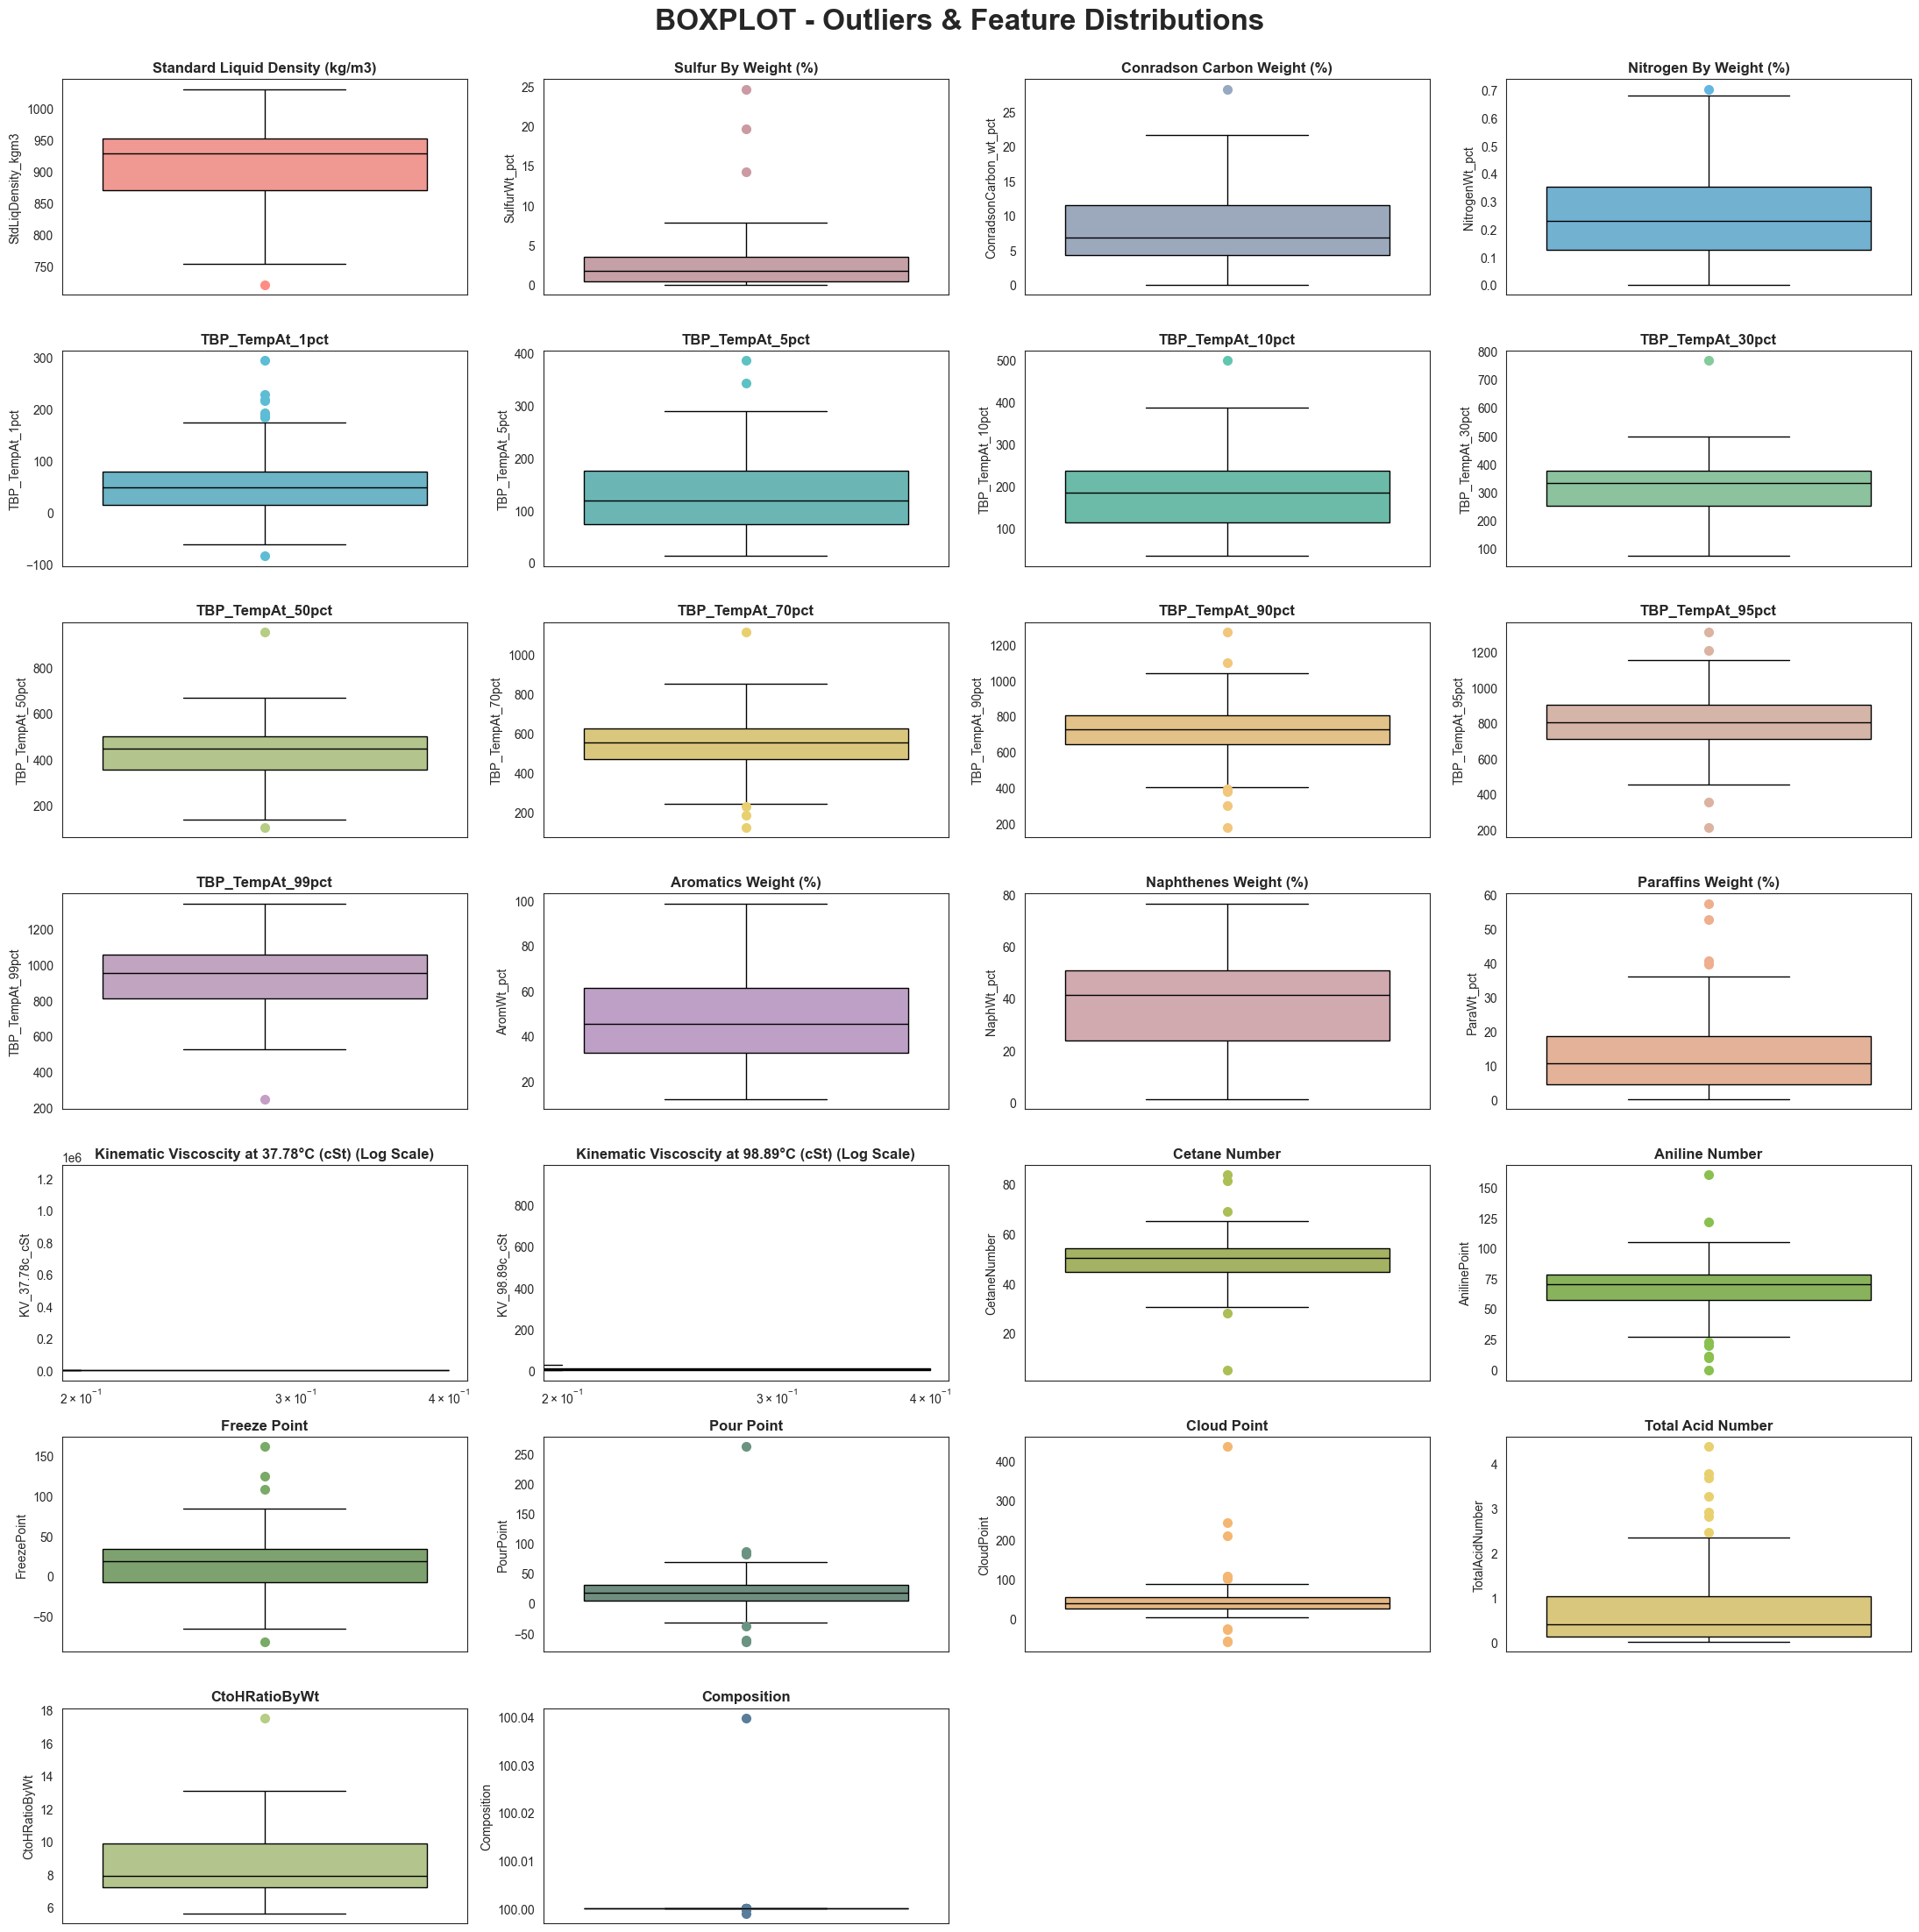

In [50]:
#Plotting Boxplot to detect outliers
sns.set_style("white")
columns = [
    ('StdLiqDensity_kgm3', '#ff8c82', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', '#cb9aa2', 'Sulfur By Weight (%)'),
    ('ConradsonCarbon_wt_pct', '#97a8c2', 'Conradson Carbon Weight (%)'),
    ('NitrogenWt_pct', '#63b6e1', 'Nitrogen By Weight (%)'),
    ('TBP_TempAt_1pct', '#5dbdd5', 'TBP_TempAt_1pct'),
    ('TBP_TempAt_5pct', '#5ec2c2', 'TBP_TempAt_5pct'),
    ('TBP_TempAt_10pct', '#5fc7af', 'TBP_TempAt_10pct'),
    ('TBP_TempAt_30pct', '#83cb9a', 'TBP_TempAt_30pct'),
    ('TBP_TempAt_50pct', '#b6cd84', 'TBP_TempAt_50pct'),
    ('TBP_TempAt_70pct', '#e9d06f', 'TBP_TempAt_70pct'),
    ('TBP_TempAt_90pct', '#f2c67b', 'TBP_TempAt_90pct'),
    ('TBP_TempAt_95pct', '#dcb2a0', 'TBP_TempAt_95pct'),
    ('TBP_TempAt_99pct', '#c59fc4', 'TBP_TempAt_99pct'),
    ('AromWt_pct', '#c299cc', 'Aromatics Weight (%)'),
    ('NaphWt_pct', '#d8a3ac', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', '#efae8d', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', '#f4b773', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', '#d0bb65', 'Kinematic Viscoscity at 98.89°C (cSt)'),
    ('CetaneNumber', '#abbf56', 'Cetane Number'),
    ('AnilinePoint', '#89c04e', 'Aniline Number'),
    ('FreezePoint', '#79aa67', 'Freeze Point'),
    ('PourPoint', '#6a9381', 'Pour Point'),
    ('CloudPoint', "#f4b773", 'Cloud Point'),
    ('TotalAcidNumber', '#e9d06f', 'Total Acid Number'),
    ('CtoHRatioByWt', '#b6cd84', 'CtoHRatioByWt'),
    ('Composition', '#5a7d9a', 'Composition')
]

fig, axes = plt.subplots(7, 4, figsize=(22, 22))
fig.suptitle("BOXPLOT - Outliers & Feature Distributions", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(columns):]:
    ax.axis('off')

for ax, (col, color, title) in zip(axes, columns):
    sns.boxplot(df[col],color=color, boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), 
                capprops=dict(color='black'), medianprops=dict(color='black'), flierprops=dict(markerfacecolor=color,
                markeredgecolor=color, markersize=7), ax=ax)
    
    if "Viscoscity" in title or "cSt" in title:  
        ax.set_xscale("log") 
        ax.set_title(f"{title} (Log Scale)", fontsize=12, fontweight="bold")
    else:
        ax.set_title(f"{title}", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

- High Aromatics (Composition): The crude is unusually high in Aromatics (median ~46%) and low in Paraffins (~13%). This makes it good for chemicals/asphalt but poor for diesel.

- Heavy Residue (Carbon): The high Carbon Residue (median ~7%) indicates these are Heavy crudes that will leave a lot of solid waste (coke) during refining.

- Solid Outliers (Viscosity): The viscosity plot shows massive outliers (up to 849,000 cSt), confirming the dataset contains solid Bitumen that cannot flow in pipelines without heating.

- Dirty (Nitrogen): The Nitrogen content is high, meaning these oils are "poisonous" to refinery catalysts and expensive to clean.

In [63]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_stats = {}

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_stats[col] = outlier_count

outlier_stats = pd.Series(outlier_stats).sort_values(ascending=False)
outlier_stats.head(10)


KV_37.78c_cSt       21
Composition         17
KV_98.89c_cSt       15
TBP_TempAt_1pct      9
CloudPoint           9
TBP_TempAt_90pct     7
TotalAcidNumber      7
AnilinePoint         7
PourPoint            6
CetaneNumber         5
dtype: int64

#### 4.1.3 Violin Plots

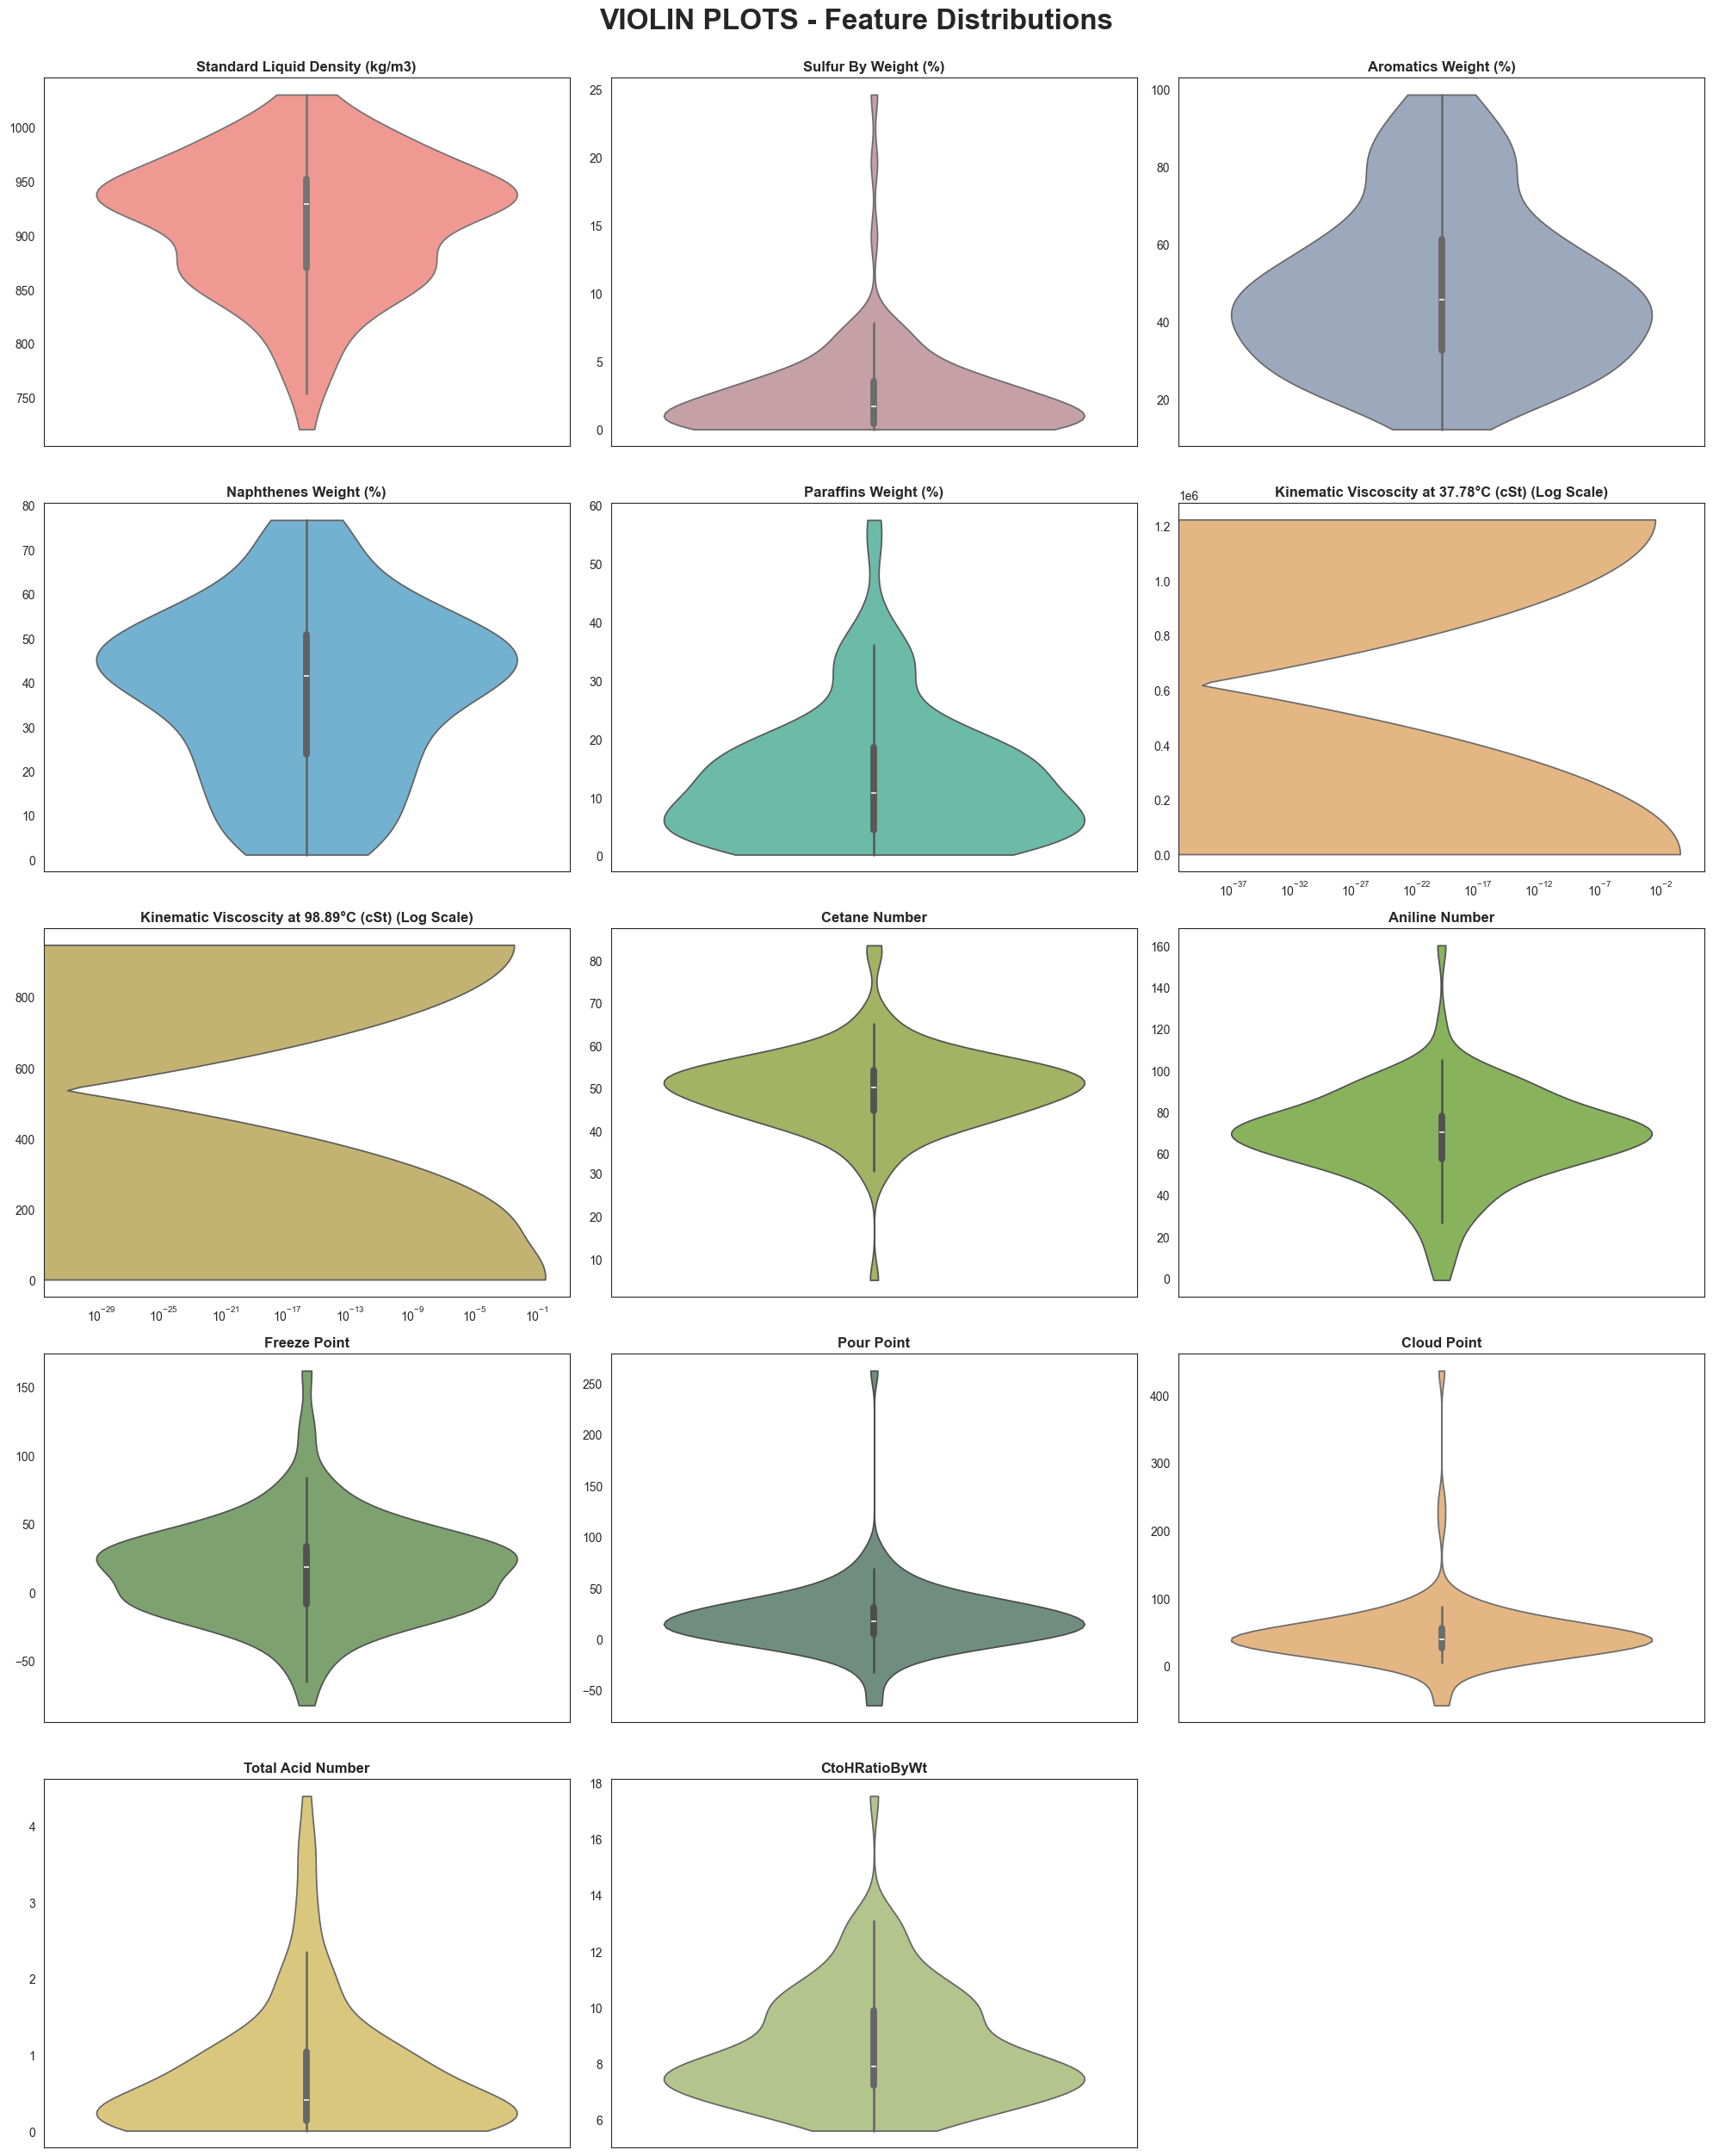

In [51]:
sns.set_style("white")

violin_cols = [
    ('StdLiqDensity_kgm3', '#ff8c82', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', '#cb9aa2', 'Sulfur By Weight (%)'),
    ('AromWt_pct','#97a8c2', 'Aromatics Weight (%)'),
    ('NaphWt_pct', '#63b6e1', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', '#5fc7af', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', '#f4b773', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', '#d0bb65', 'Kinematic Viscoscity at 98.89°C (cSt)'),
    ('CetaneNumber', '#abbf56', 'Cetane Number'),
    ('AnilinePoint', '#89c04e', 'Aniline Number'),
    ('FreezePoint', '#79aa67', 'Freeze Point'),
    ('PourPoint', '#6a9381', 'Pour Point'),
    ('CloudPoint', "#f4b773", 'Cloud Point'),
    ('TotalAcidNumber', '#e9d06f', 'Total Acid Number'),
    ('CtoHRatioByWt', '#b6cd84', 'CtoHRatioByWt')
]

fig, axes = plt.subplots(5, 3, figsize=(20, 25))
fig.suptitle("VIOLIN PLOTS - Feature Distributions", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(violin_cols):]:
    ax.axis('off')

for ax, (col, color, title) in zip(axes, violin_cols):
    sns.violinplot(df[col],color=color, inner="box", cut=0, ax=ax)

    if "Viscoscity" in title or "cSt" in title:
        ax.set_xscale("log")
        ax.set_title(f"{title} (Log Scale)", fontsize=12, fontweight="bold")
    else:
        ax.set_title(f"{title}", fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


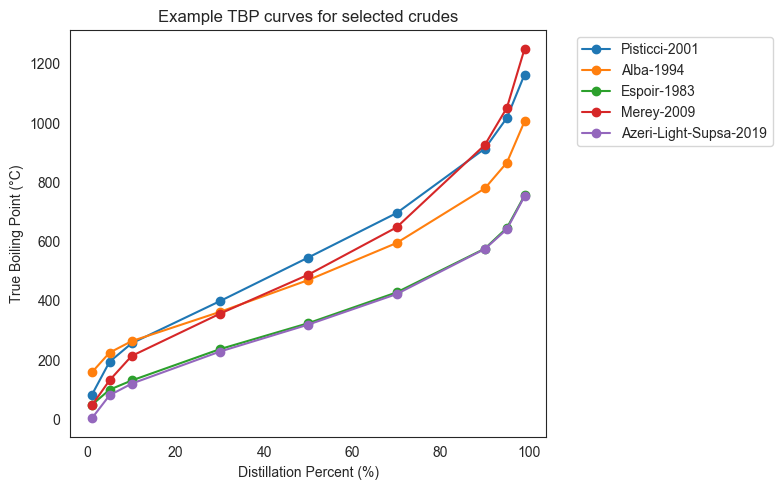

In [52]:
tbp_cols = [
    "TBP_TempAt_1pct",
    "TBP_TempAt_5pct",
    "TBP_TempAt_10pct",
    "TBP_TempAt_30pct",
    "TBP_TempAt_50pct",
    "TBP_TempAt_70pct",
    "TBP_TempAt_90pct",
    "TBP_TempAt_95pct",
    "TBP_TempAt_99pct",
]

cut_points = [1, 5, 10, 30, 50, 70, 90, 95, 99]

plt.figure(figsize=(8, 5))
for i, row in df.sample(min(5, len(df)), random_state=42).iterrows():
    plt.plot(cut_points, row[tbp_cols].values, marker="o", label=row["Crude_Name"])

plt.xlabel("Distillation Percent (%)")
plt.ylabel("True Boiling Point (°C)")
plt.title("Example TBP curves for selected crudes")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


#### 4.1.4 QQ Plot - Normality Assessment

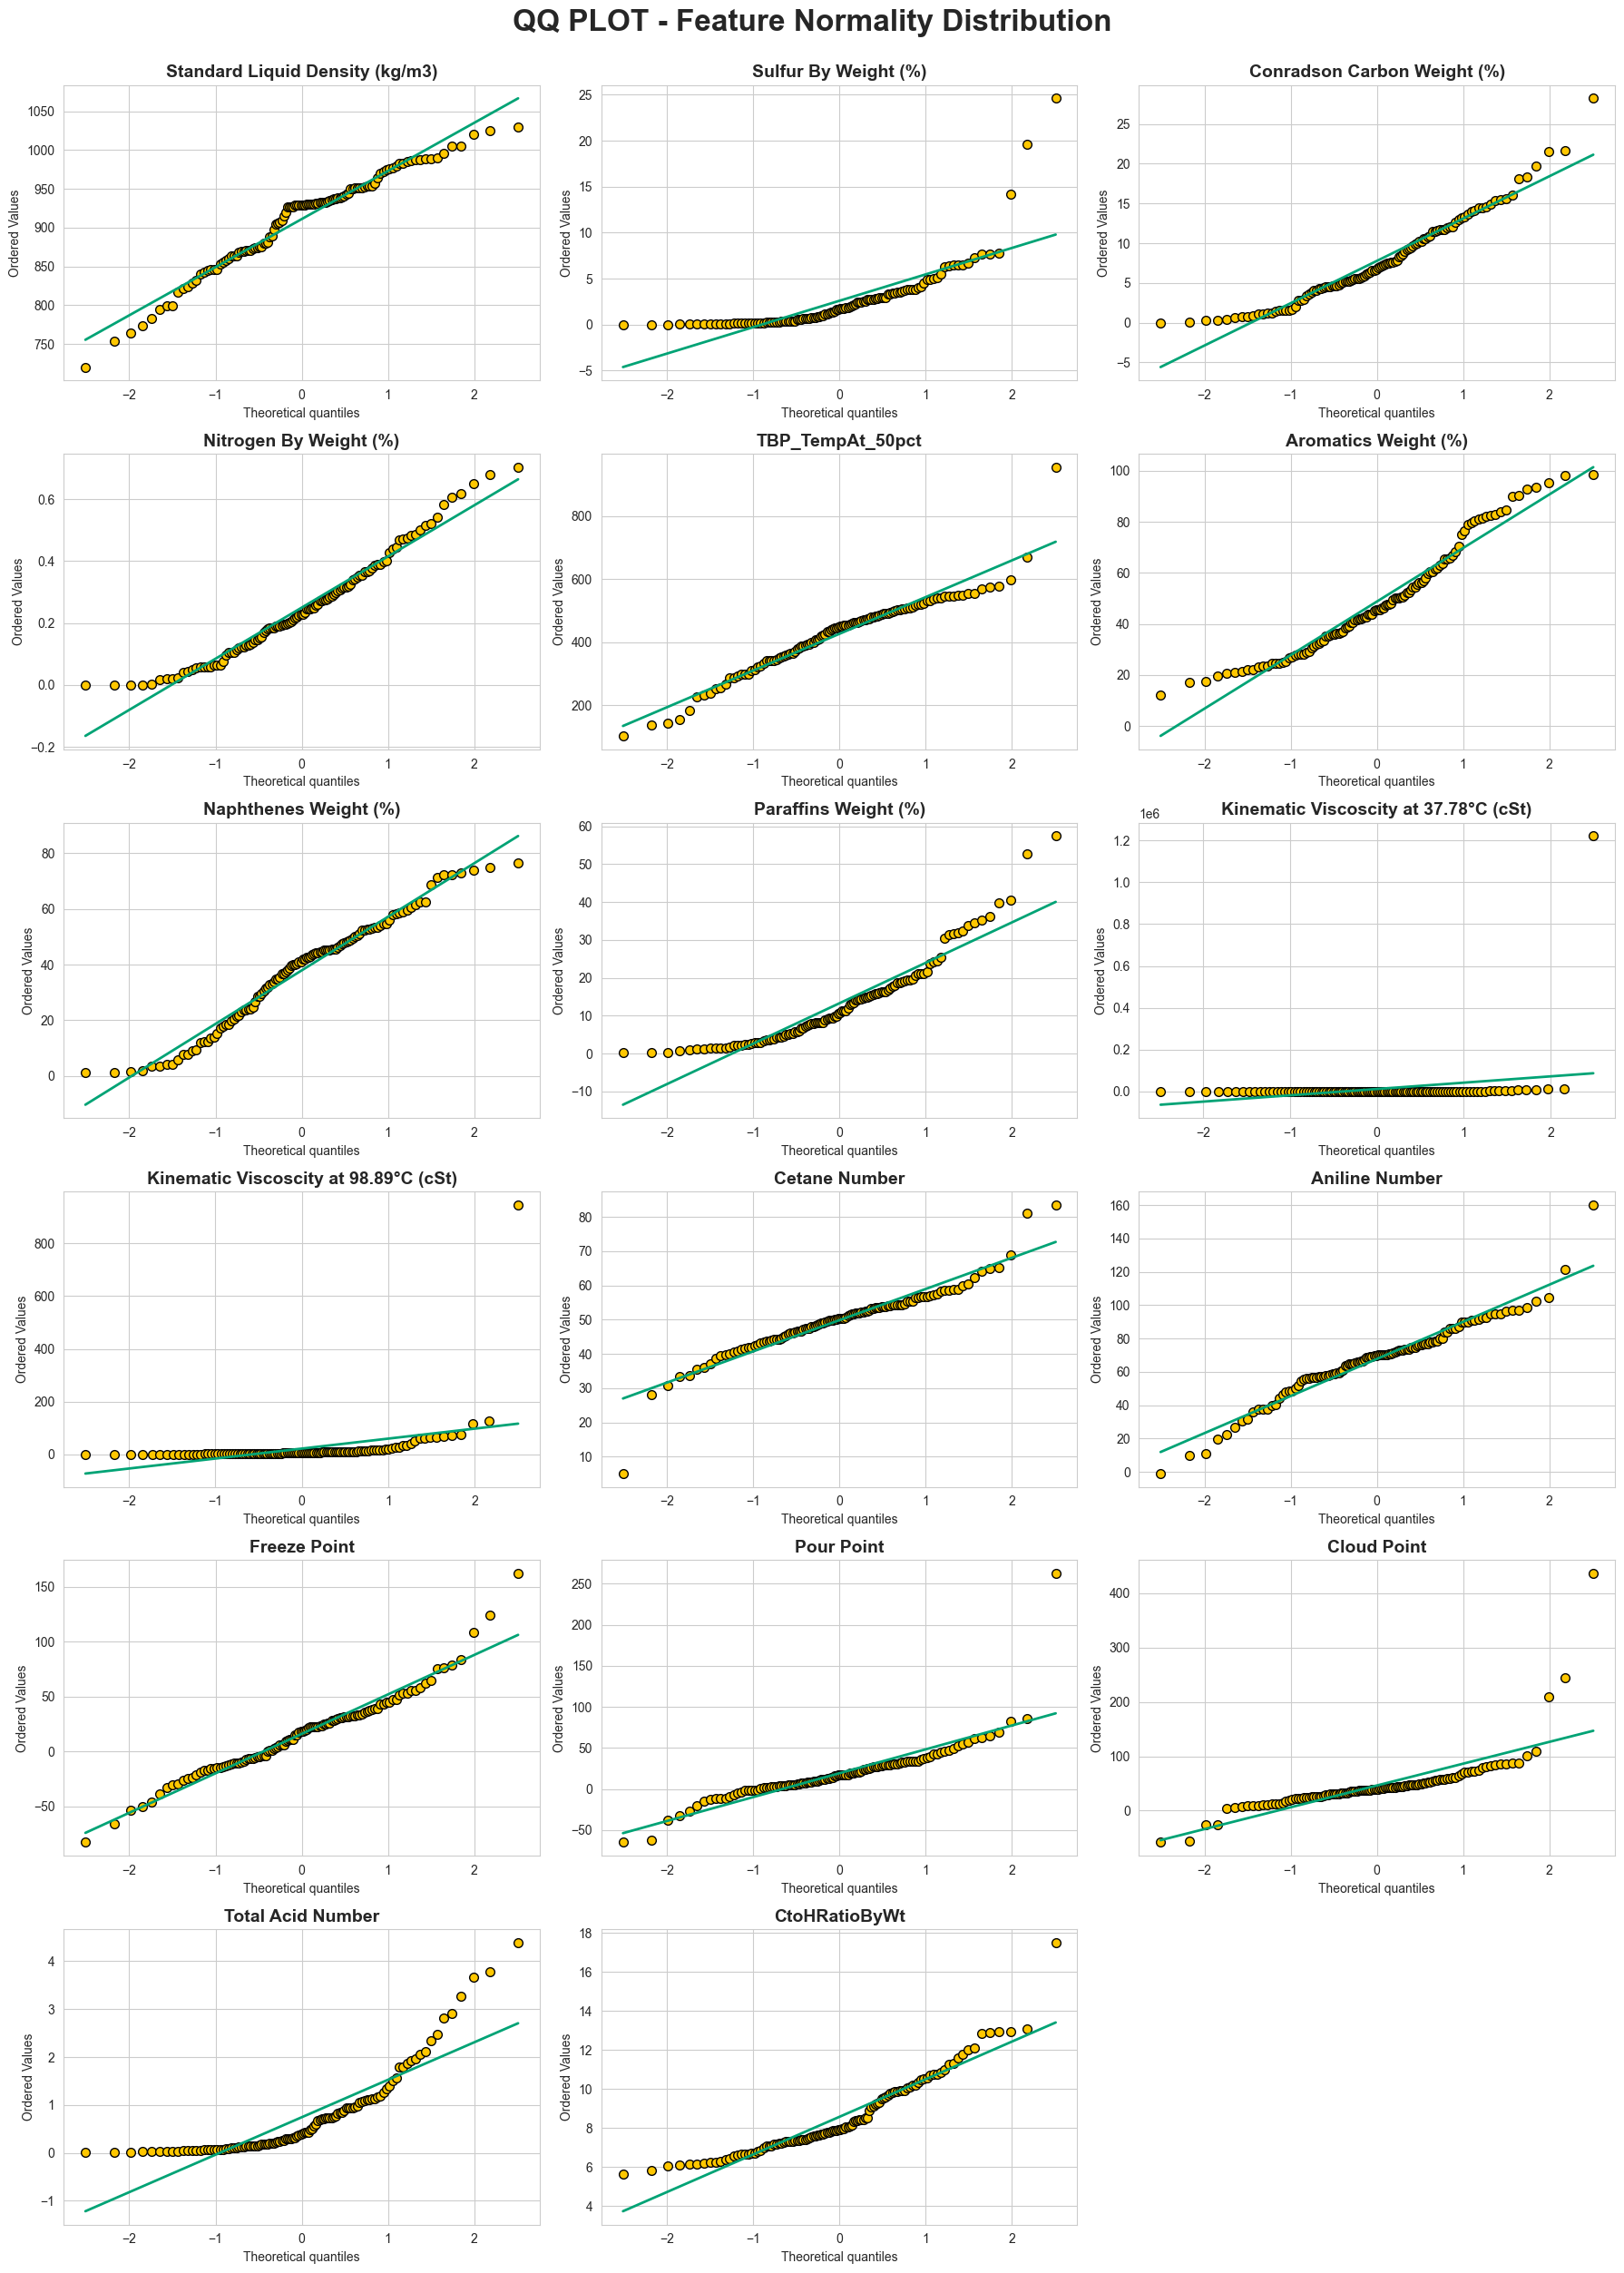

In [53]:
#Plotting QQ Plot to detect outliers
sns.set_style("whitegrid")

qq = [
    ('StdLiqDensity_kgm3', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', 'Sulfur By Weight (%)'),
    ('ConradsonCarbon_wt_pct', 'Conradson Carbon Weight (%)'),
    ('NitrogenWt_pct', 'Nitrogen By Weight (%)'),
    ('TBP_TempAt_50pct', 'TBP_TempAt_50pct'),
    ('AromWt_pct', 'Aromatics Weight (%)'),
    ('NaphWt_pct', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', 'Kinematic Viscoscity at 98.89°C (cSt)'),
    ('CetaneNumber', 'Cetane Number'),
    ('AnilinePoint', 'Aniline Number'),
    ('FreezePoint', 'Freeze Point'),
    ('PourPoint', 'Pour Point'),
    ('CloudPoint', 'Cloud Point'),
    ('TotalAcidNumber', 'Total Acid Number'),
    ('CtoHRatioByWt', 'CtoHRatioByWt')
]

fig, axes = plt.subplots(6, 3, figsize=(18, 25))
fig.suptitle("QQ PLOT - Feature Normality Distribution", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(qq):]:
    ax.axis('off')

for ax, (col, title) in zip(axes, qq):
    stats.probplot(df[col].dropna(), dist="norm", plot=ax)

    lines = ax.get_lines()
    lines[1].set_color("#00A375")
    lines[1].set_linewidth(2)

    lines[0].set_markerfacecolor('#FFC700')
    lines[0].set_markeredgecolor('black')
    lines[0].set_markersize(7)

    ax.set_title(title, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### 4.2 BIVARIATE ANALYSIS
#### 4.2.1 Scatter Plots - Independent Variables vs Output Set 1 

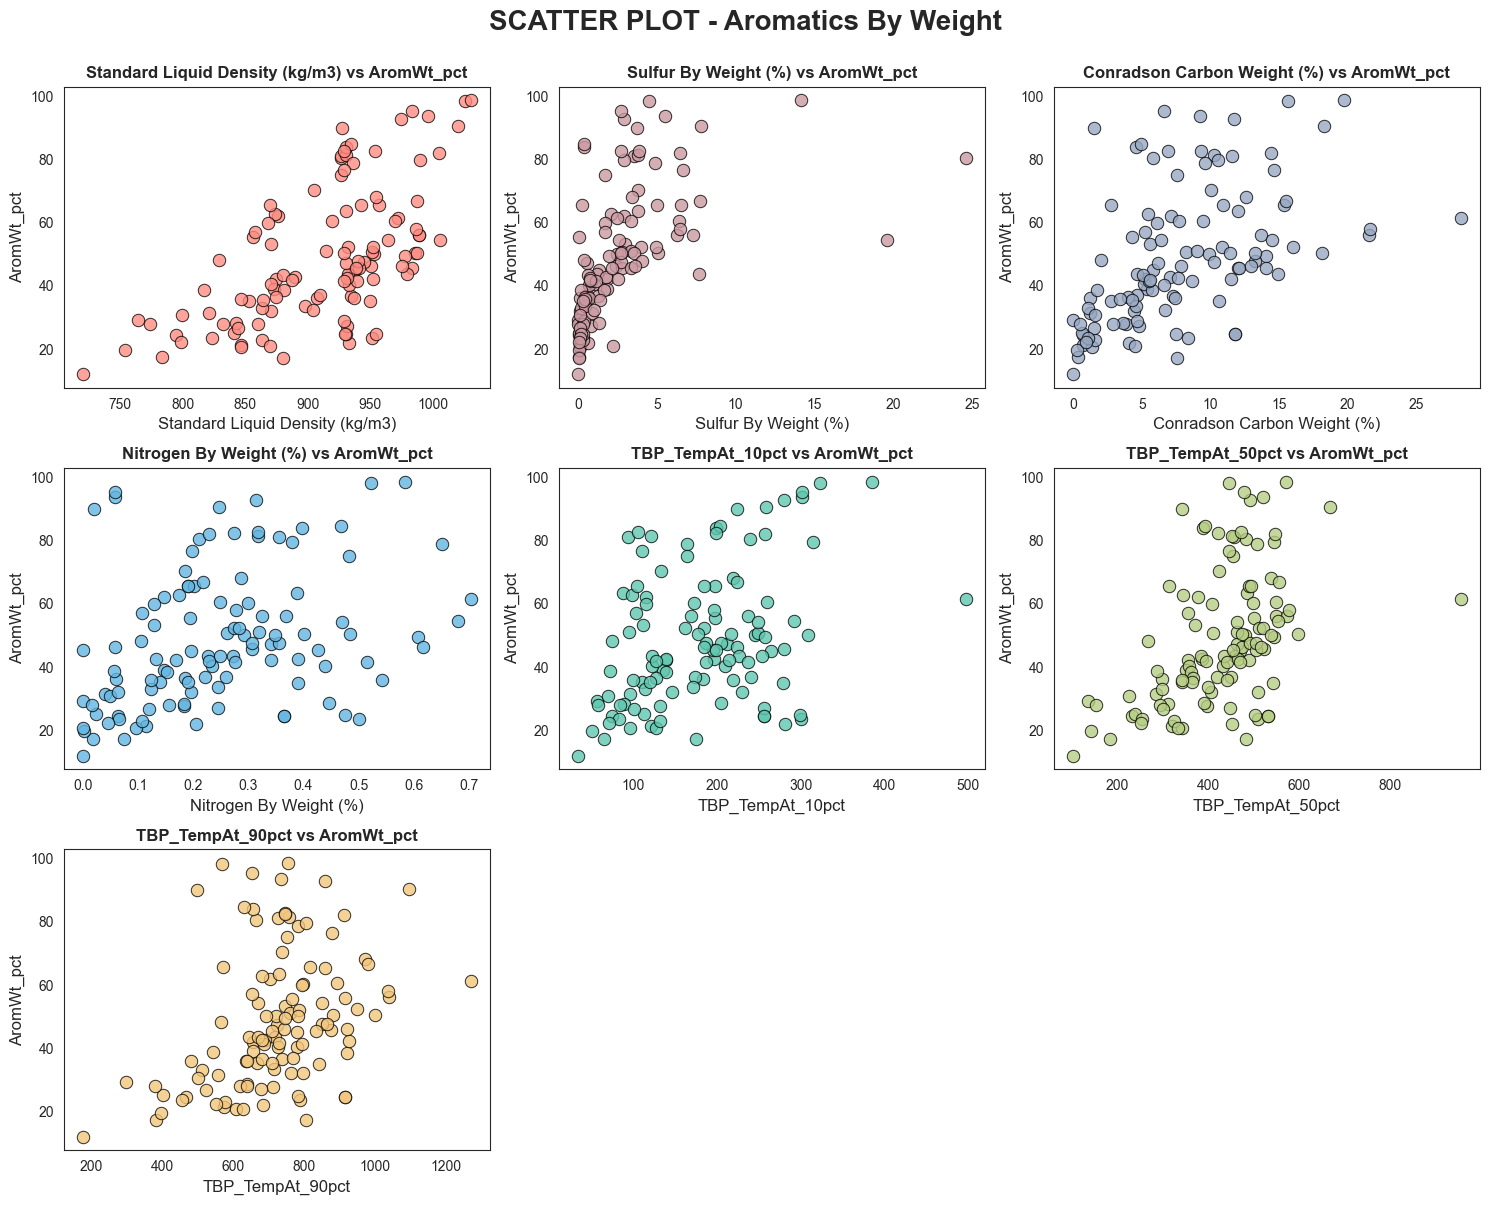

In [54]:
meta_dict = {col: (color, title) for col, color, title in columns}

features = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
            'TBP_TempAt_10pct', 'TBP_TempAt_50pct', 'TBP_TempAt_90pct']

output = ['AromWt_pct'] 

sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle(f"SCATTER PLOT - Aromatics By Weight", fontsize=20, fontweight="bold", y=1)
axes = axes.flatten()

for ax in axes[len(features):]:
    ax.axis('off')

for ax, feature in zip(axes, features):
    if feature in meta_dict:
        color, title = meta_dict[feature]
        
        sns.scatterplot(x=df[feature], y=df[output].squeeze(), ax=ax, 
                        color=color, edgecolors='black', s=80, alpha=0.8)
        
        ax.set_xlabel(title, fontsize=12)           
        ax.set_ylabel(output[0], fontsize=12)
        ax.set_title(f'{title} vs {output[0]}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

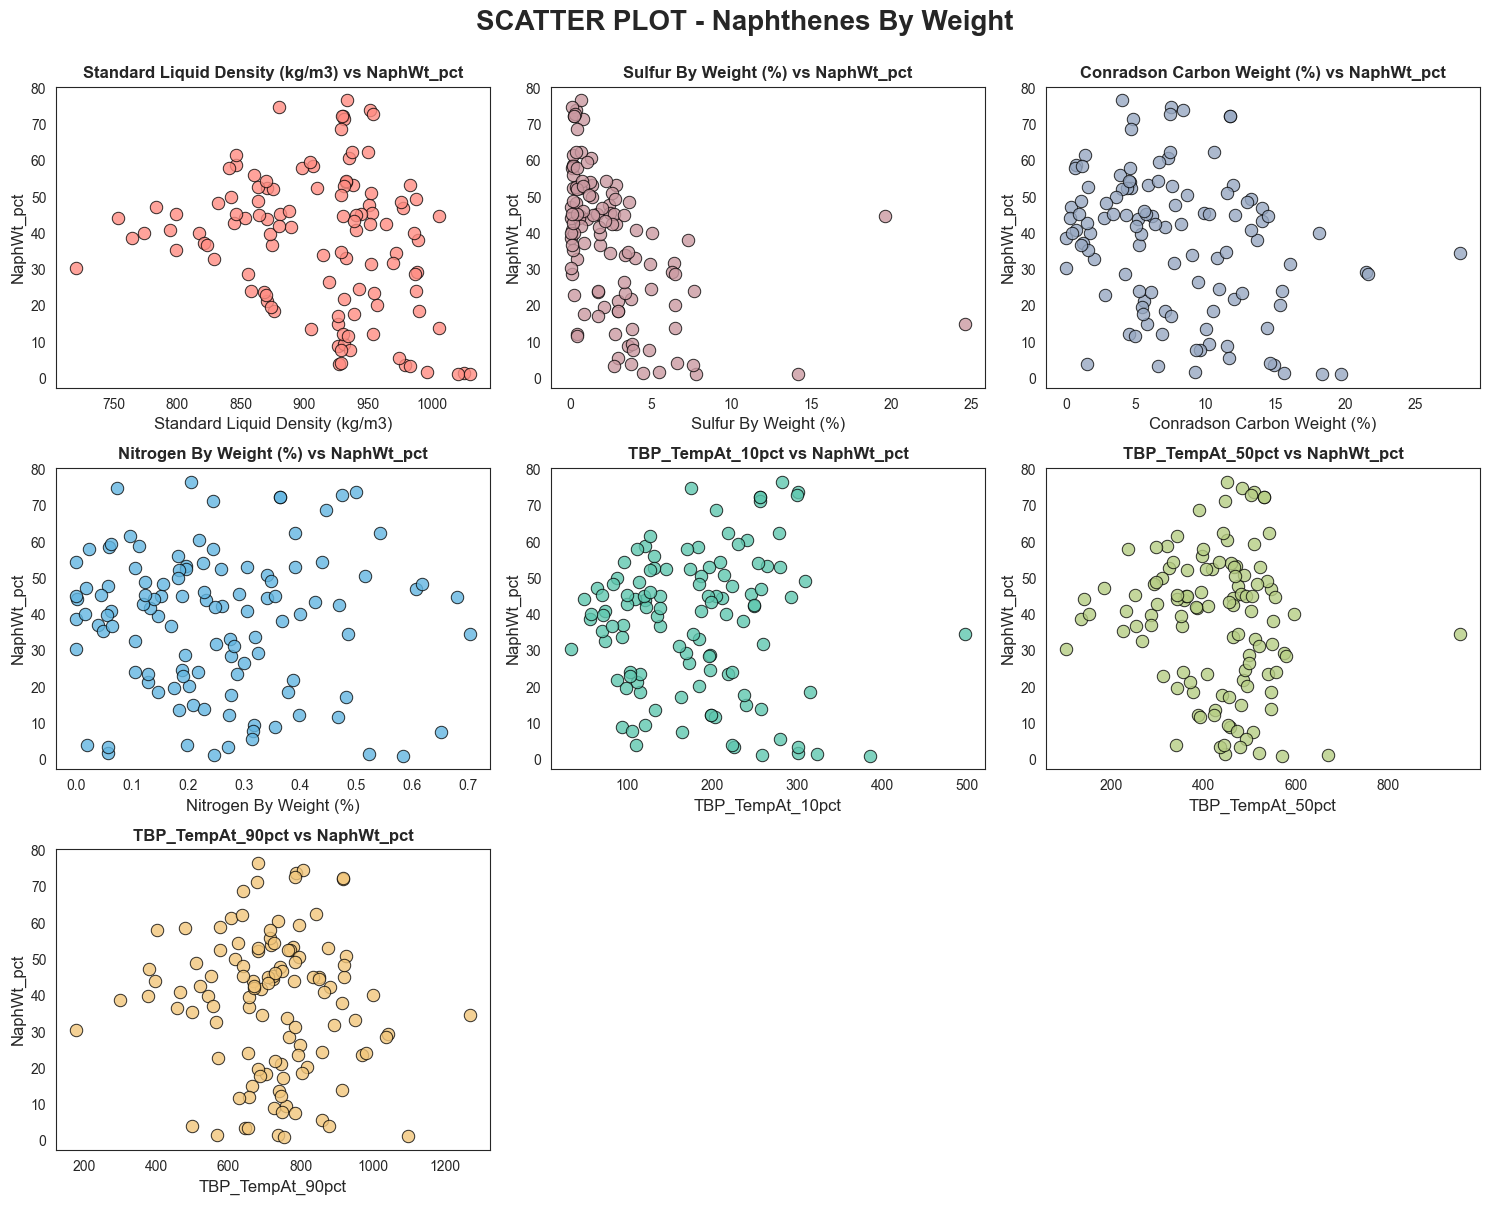

In [55]:
meta_dict = {col: (color, title) for col, color, title in columns}

features = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
            'TBP_TempAt_10pct', 'TBP_TempAt_50pct', 'TBP_TempAt_90pct']

output = ['NaphWt_pct'] 

sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle(f"SCATTER PLOT - Naphthenes By Weight", fontsize=20, fontweight="bold", y=1)
axes = axes.flatten()

for ax in axes[len(features):]:
    ax.axis('off')

for ax, feature in zip(axes, features):
    if feature in meta_dict:
        color, title = meta_dict[feature]
        
        sns.scatterplot(x=df[feature], y=df[output].squeeze(), ax=ax, 
                        color=color, edgecolors='black', s=80, alpha=0.8)
        
        ax.set_xlabel(title, fontsize=12)           
        ax.set_ylabel(output[0], fontsize=12)
        ax.set_title(f'{title} vs {output[0]}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

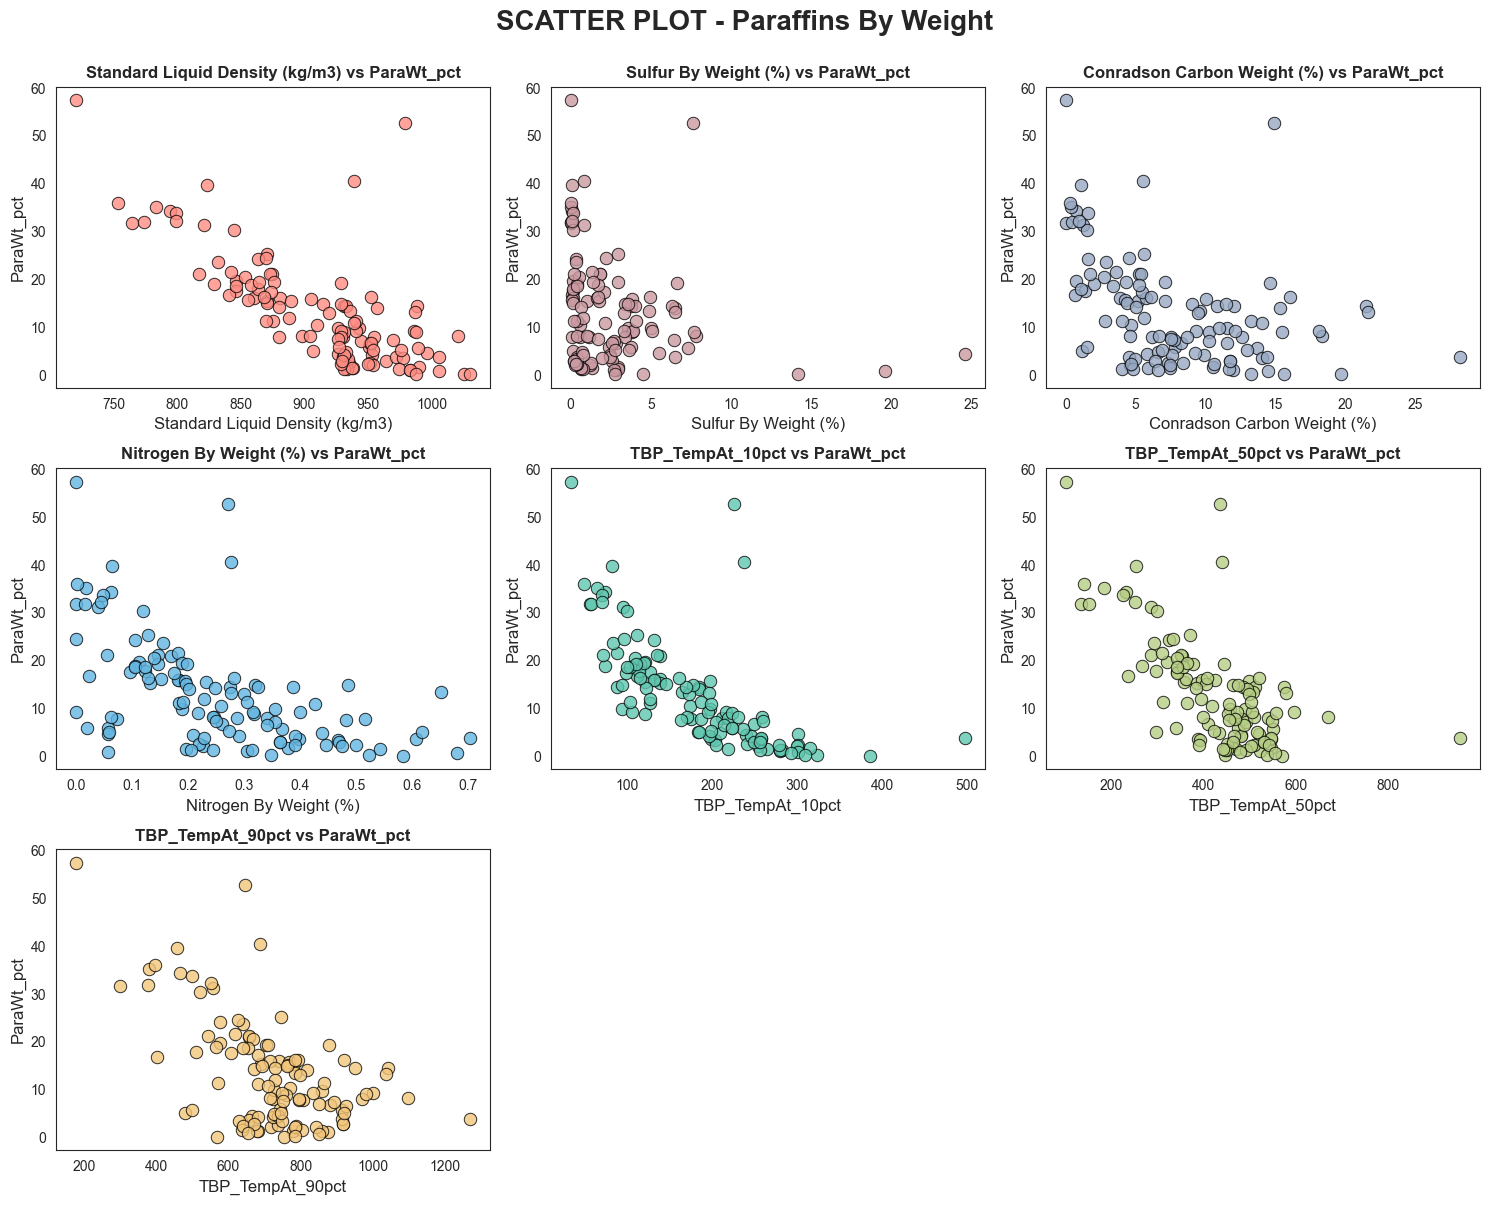

In [56]:
meta_dict = {col: (color, title) for col, color, title in columns}

features = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
            'TBP_TempAt_10pct', 'TBP_TempAt_50pct', 'TBP_TempAt_90pct']

output = ['ParaWt_pct'] 

sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle(f"SCATTER PLOT - Paraffins By Weight", fontsize=20, fontweight="bold", y=1)
axes = axes.flatten()

for ax in axes[len(features):]:
    ax.axis('off')

for ax, feature in zip(axes, features):
    if feature in meta_dict:
        color, title = meta_dict[feature]
        
        sns.scatterplot(x=df[feature], y=df[output].squeeze(), ax=ax, 
                        color=color, edgecolors='black', s=80, alpha=0.8)
        
        ax.set_xlabel(title, fontsize=12)           
        ax.set_ylabel(output[0], fontsize=12)
        ax.set_title(f'{title} vs {output[0]}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2.2 Scatter Plots - Independent Variables vs Output Set 2

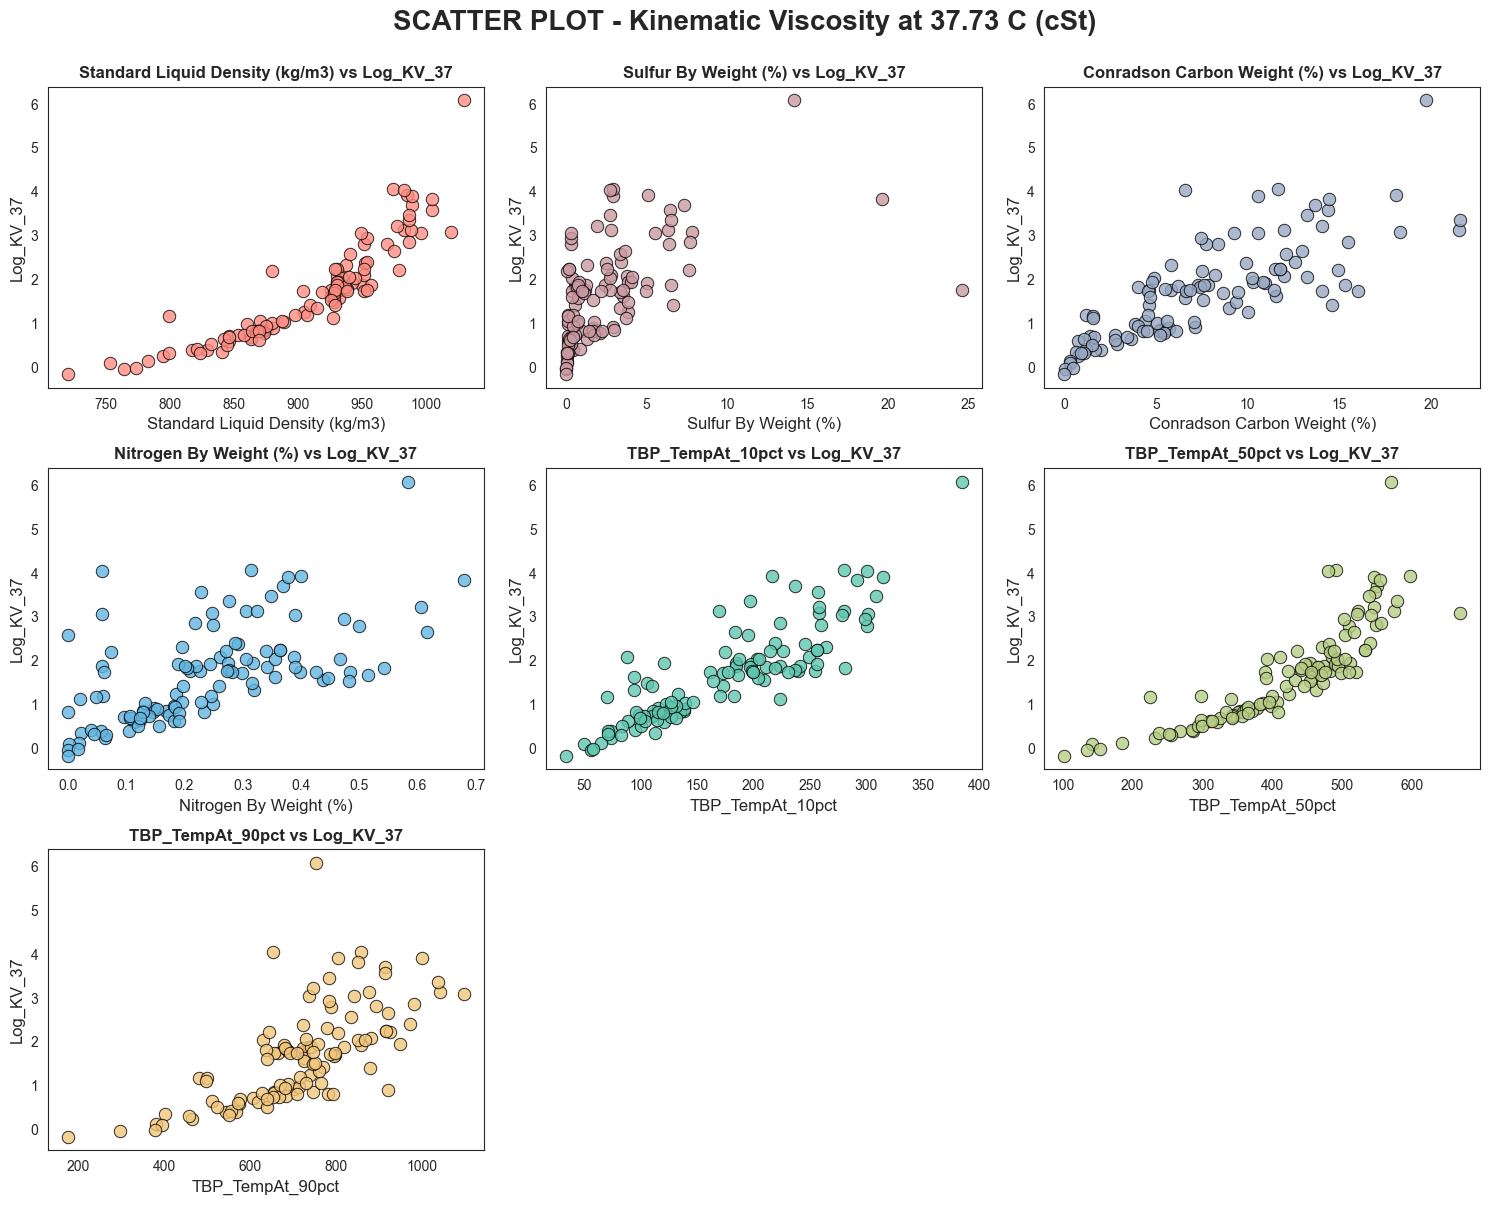

In [57]:
meta_dict = {col: (color, title) for col, color, title in columns}

features = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
            'TBP_TempAt_10pct', 'TBP_TempAt_50pct', 'TBP_TempAt_90pct']

df['Log_KV_37'] = np.log10(df['KV_37.78c_cSt'])
output=['Log_KV_37'] 

sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Kinematic Viscosity at 37.73 C (cSt)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax in axes[len(features):]:
    ax.axis('off')

for ax, feature in zip(axes, features):
    if feature in meta_dict:
        color, title = meta_dict[feature]
        
        sns.scatterplot(x=df[feature], y=df[output].squeeze(), ax=ax, 
                        color=color, edgecolors='black', s=80, alpha=0.8)
        
        ax.set_xlabel(title, fontsize=12)           
        ax.set_ylabel(output[0], fontsize=12)
        ax.set_title(f'{title} vs {output[0]}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

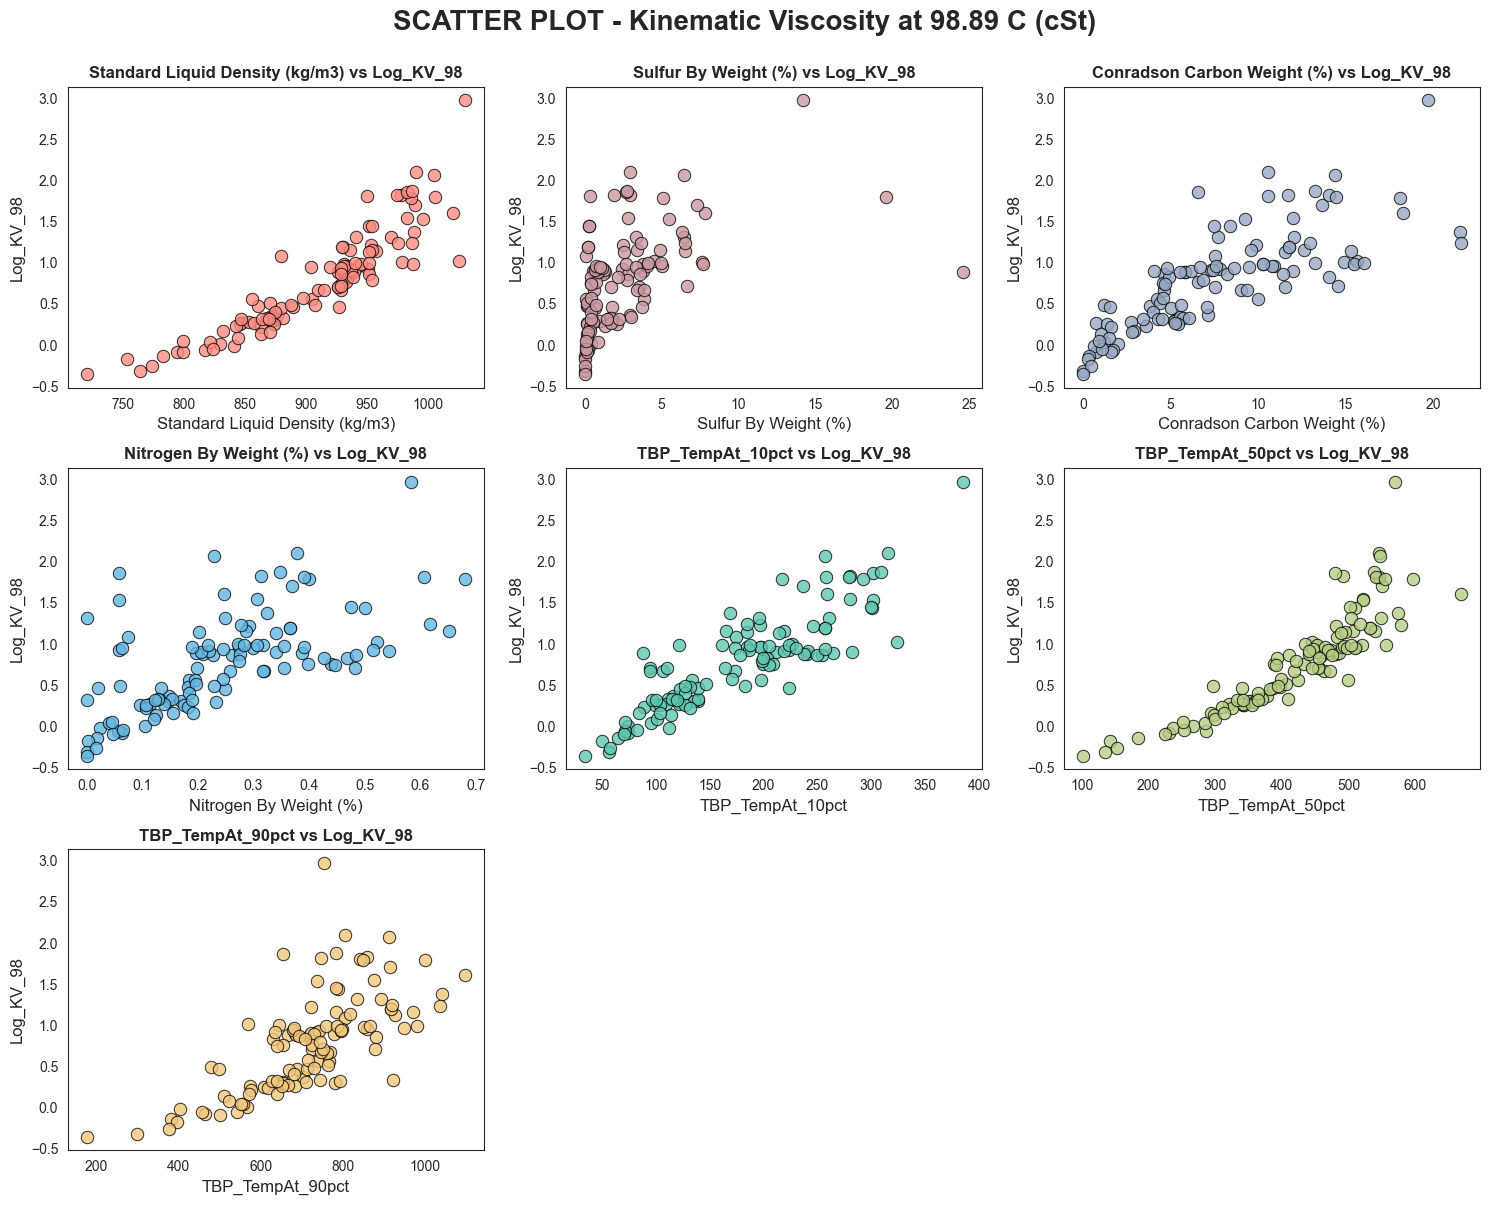

In [58]:
meta_dict = {col: (color, title) for col, color, title in columns}

features = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
            'TBP_TempAt_10pct', 'TBP_TempAt_50pct', 'TBP_TempAt_90pct']

df['Log_KV_98'] = np.log10(df['KV_98.89c_cSt'])
output=['Log_KV_98'] 

sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Kinematic Viscosity at 98.89 C (cSt)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax in axes[len(features):]:
    ax.axis('off')

for ax, feature in zip(axes, features):
    if feature in meta_dict:
        color, title = meta_dict[feature]
        
        sns.scatterplot(x=df[feature], y=df[output].squeeze(), ax=ax, 
                        color=color, edgecolors='black', s=80, alpha=0.8)
        
        ax.set_xlabel(title, fontsize=12)           
        ax.set_ylabel(output[0], fontsize=12)
        ax.set_title(f'{title} vs {output[0]}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2.3 Stacked Bar Chart - Composition Analysis

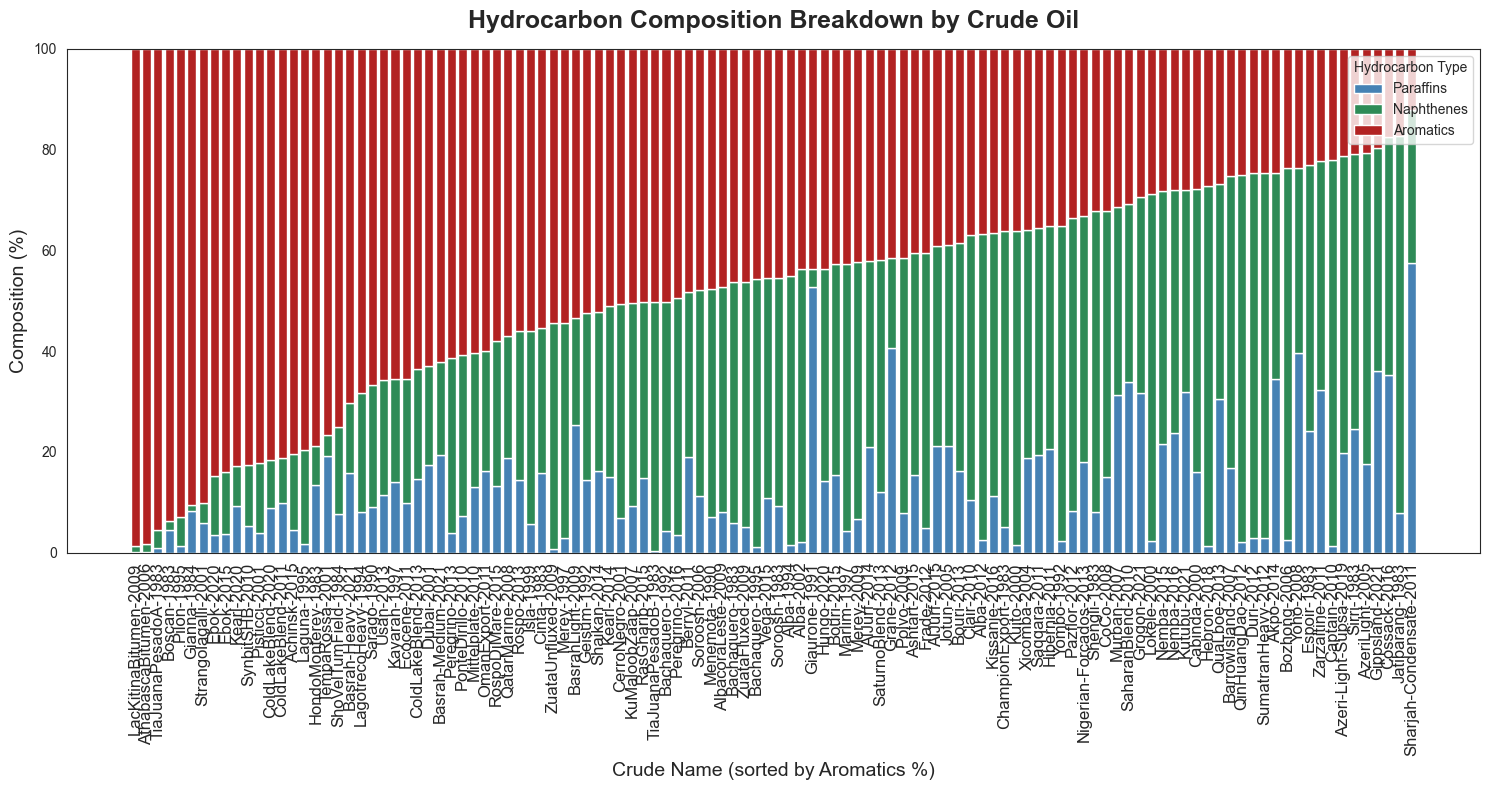

In [59]:
sns.set_style("white")

df_sorted = df.sort_values(by="AromWt_pct", ascending=False).reset_index(drop=True)
crude_names = df_sorted["Crude_Name"]

para = df_sorted["ParaWt_pct"]
naph = df_sorted["NaphWt_pct"]
arom = df_sorted["AromWt_pct"]
plt.figure(figsize=(15, 8))

plt.bar(crude_names, para, label="Paraffins", color="steelblue")
plt.bar(crude_names, naph, bottom=para, label="Naphthenes", color="seagreen")
plt.bar(crude_names, arom, bottom=para + naph, label="Aromatics", color="firebrick")
plt.ylabel("Composition (%)", fontsize=14)
plt.xlabel("Crude Name (sorted by Aromatics %)", fontsize=14)
plt.title( "Hydrocarbon Composition Breakdown by Crude Oil", fontsize=18, fontweight="bold", pad=15)

plt.ylim(0, 100)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title="Hydrocarbon Type", loc="upper right")
plt.tight_layout()
plt.show()


### 4.3 MULTIVARIATE ANALYSIS
#### 4.3.1 Pairwise Relationships

Text(0.5, 1.02, 'PAIRPLOT - Feature Relationships')

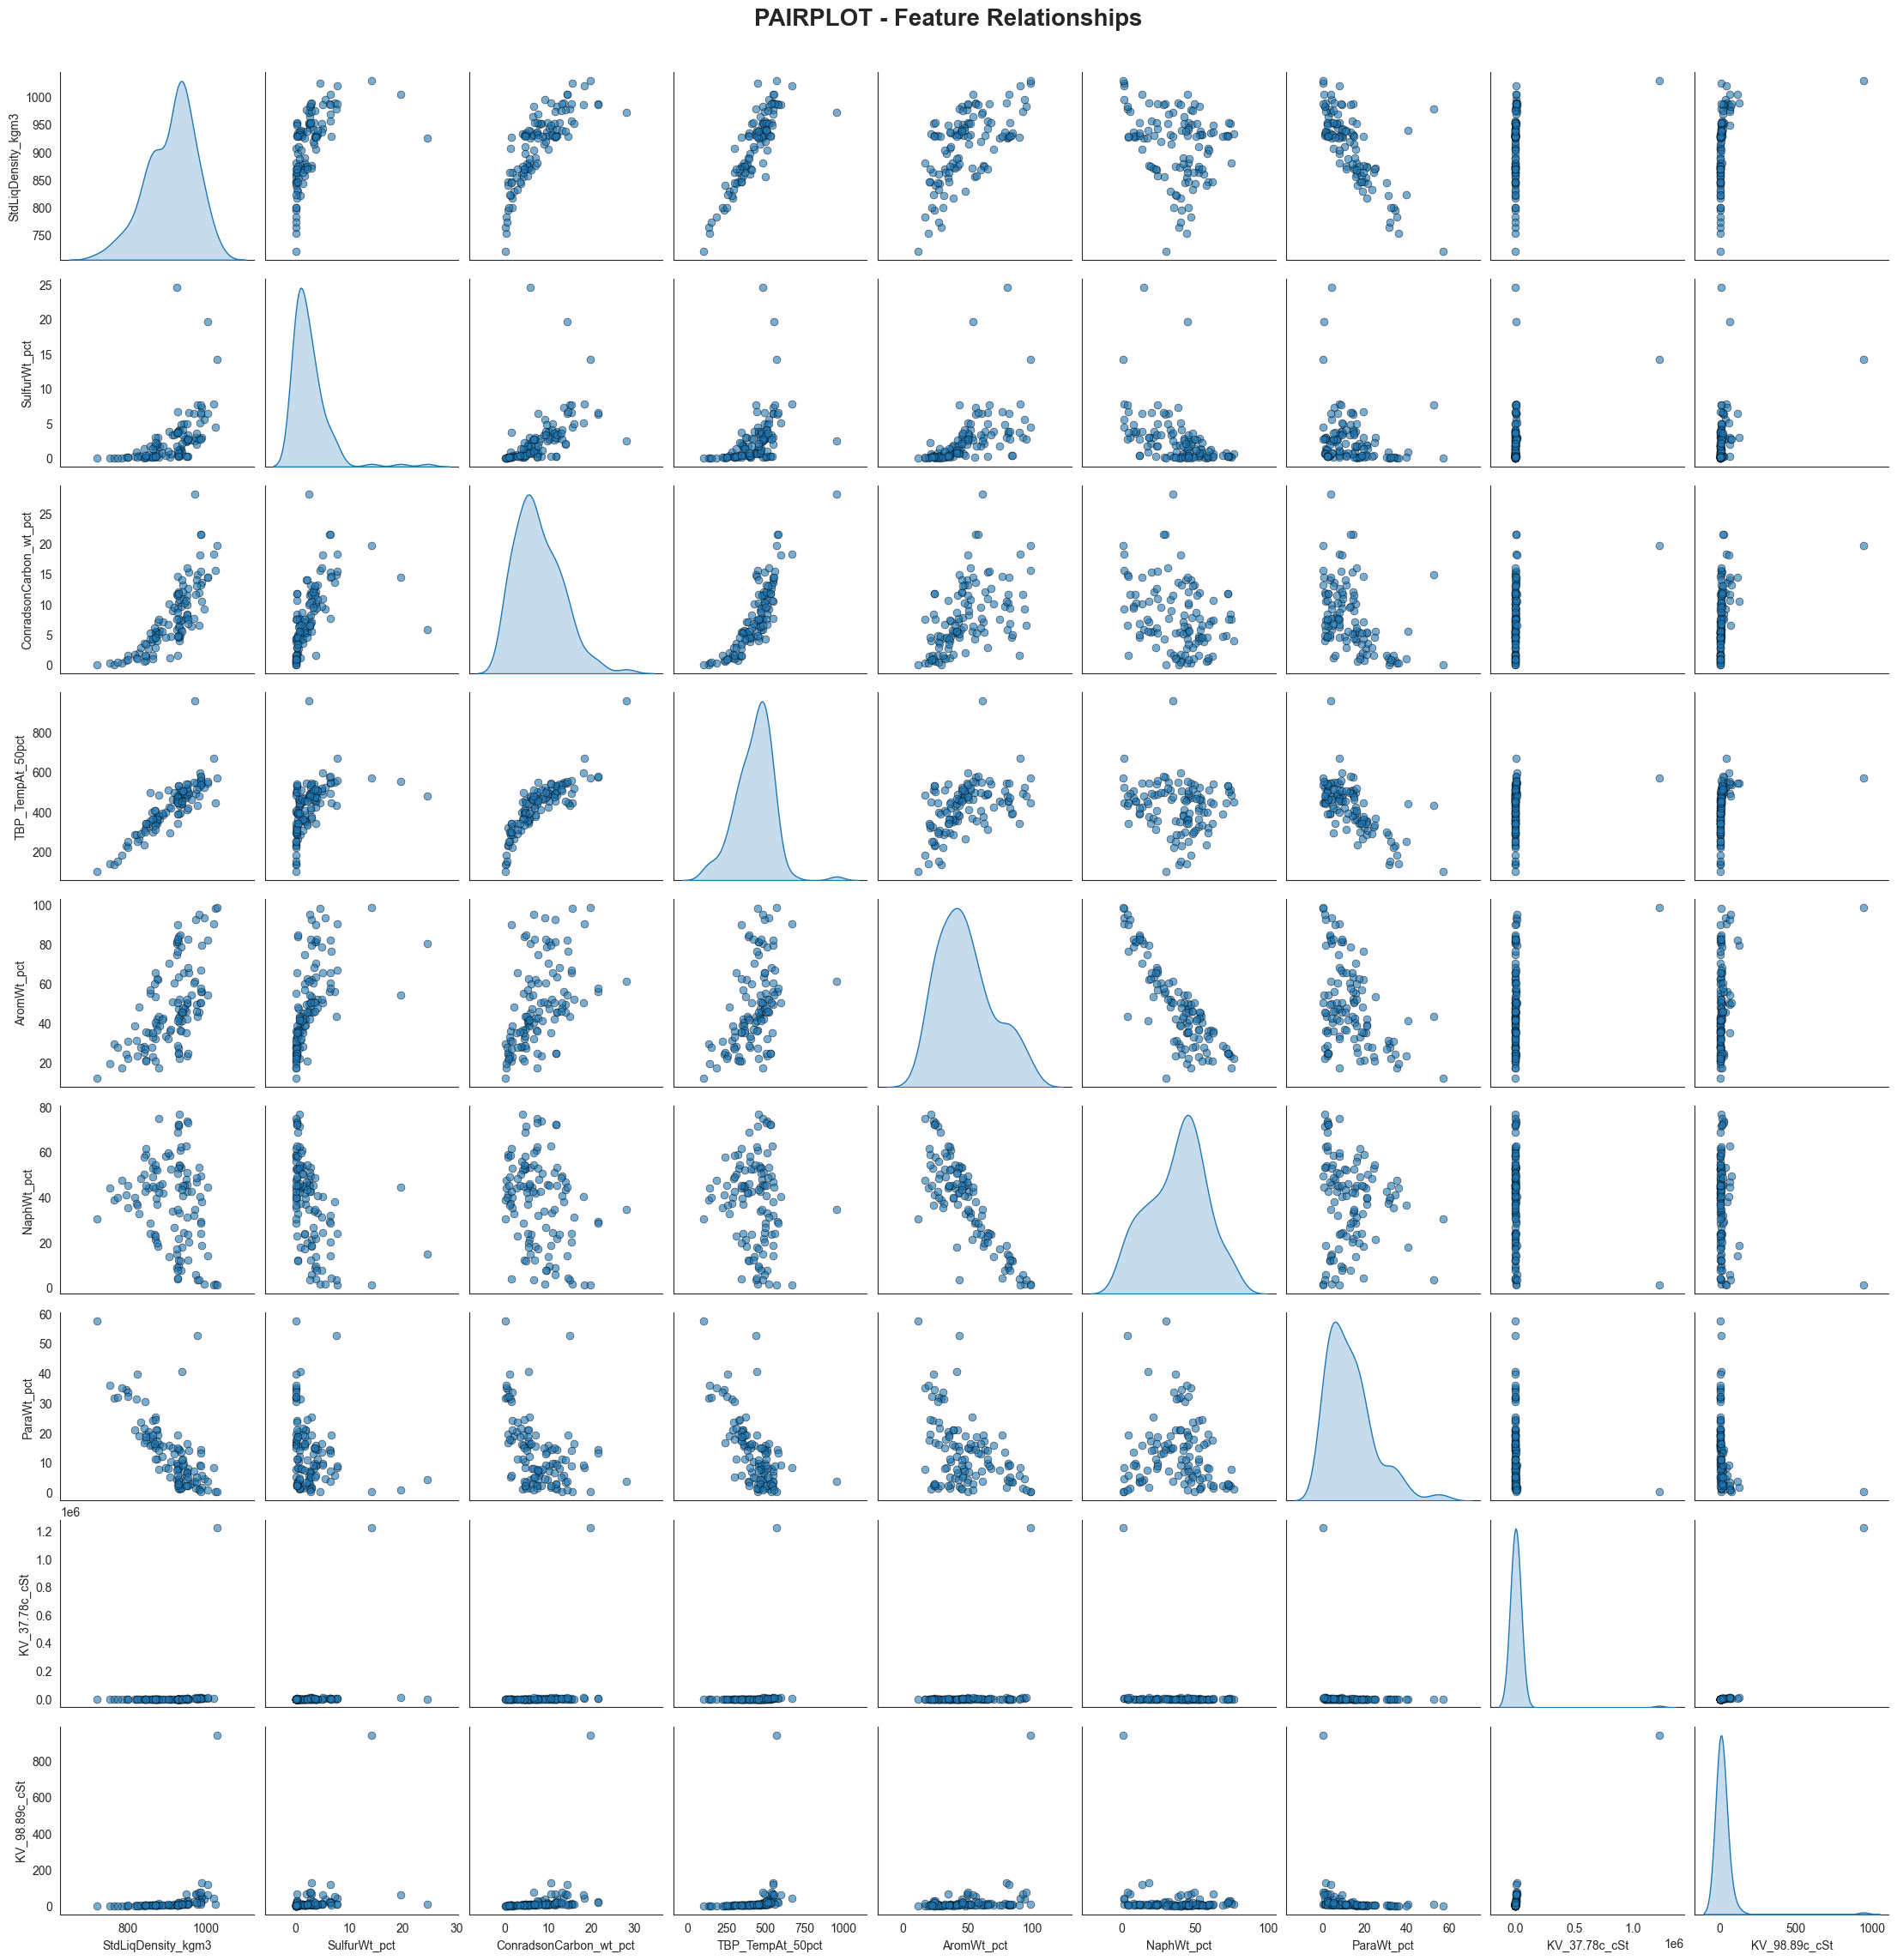

In [60]:
variables = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct','TBP_TempAt_50pct',
             'AromWt_pct', 'NaphWt_pct', 'ParaWt_pct', 'KV_37.78c_cSt', 'KV_98.89c_cSt']

sns.pairplot(df[variables], diag_kind='kde', plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'})
plt.suptitle("PAIRPLOT - Feature Relationships", fontsize=20, fontweight="bold",y=1.02)

#### 4.3.2 Correlation Map

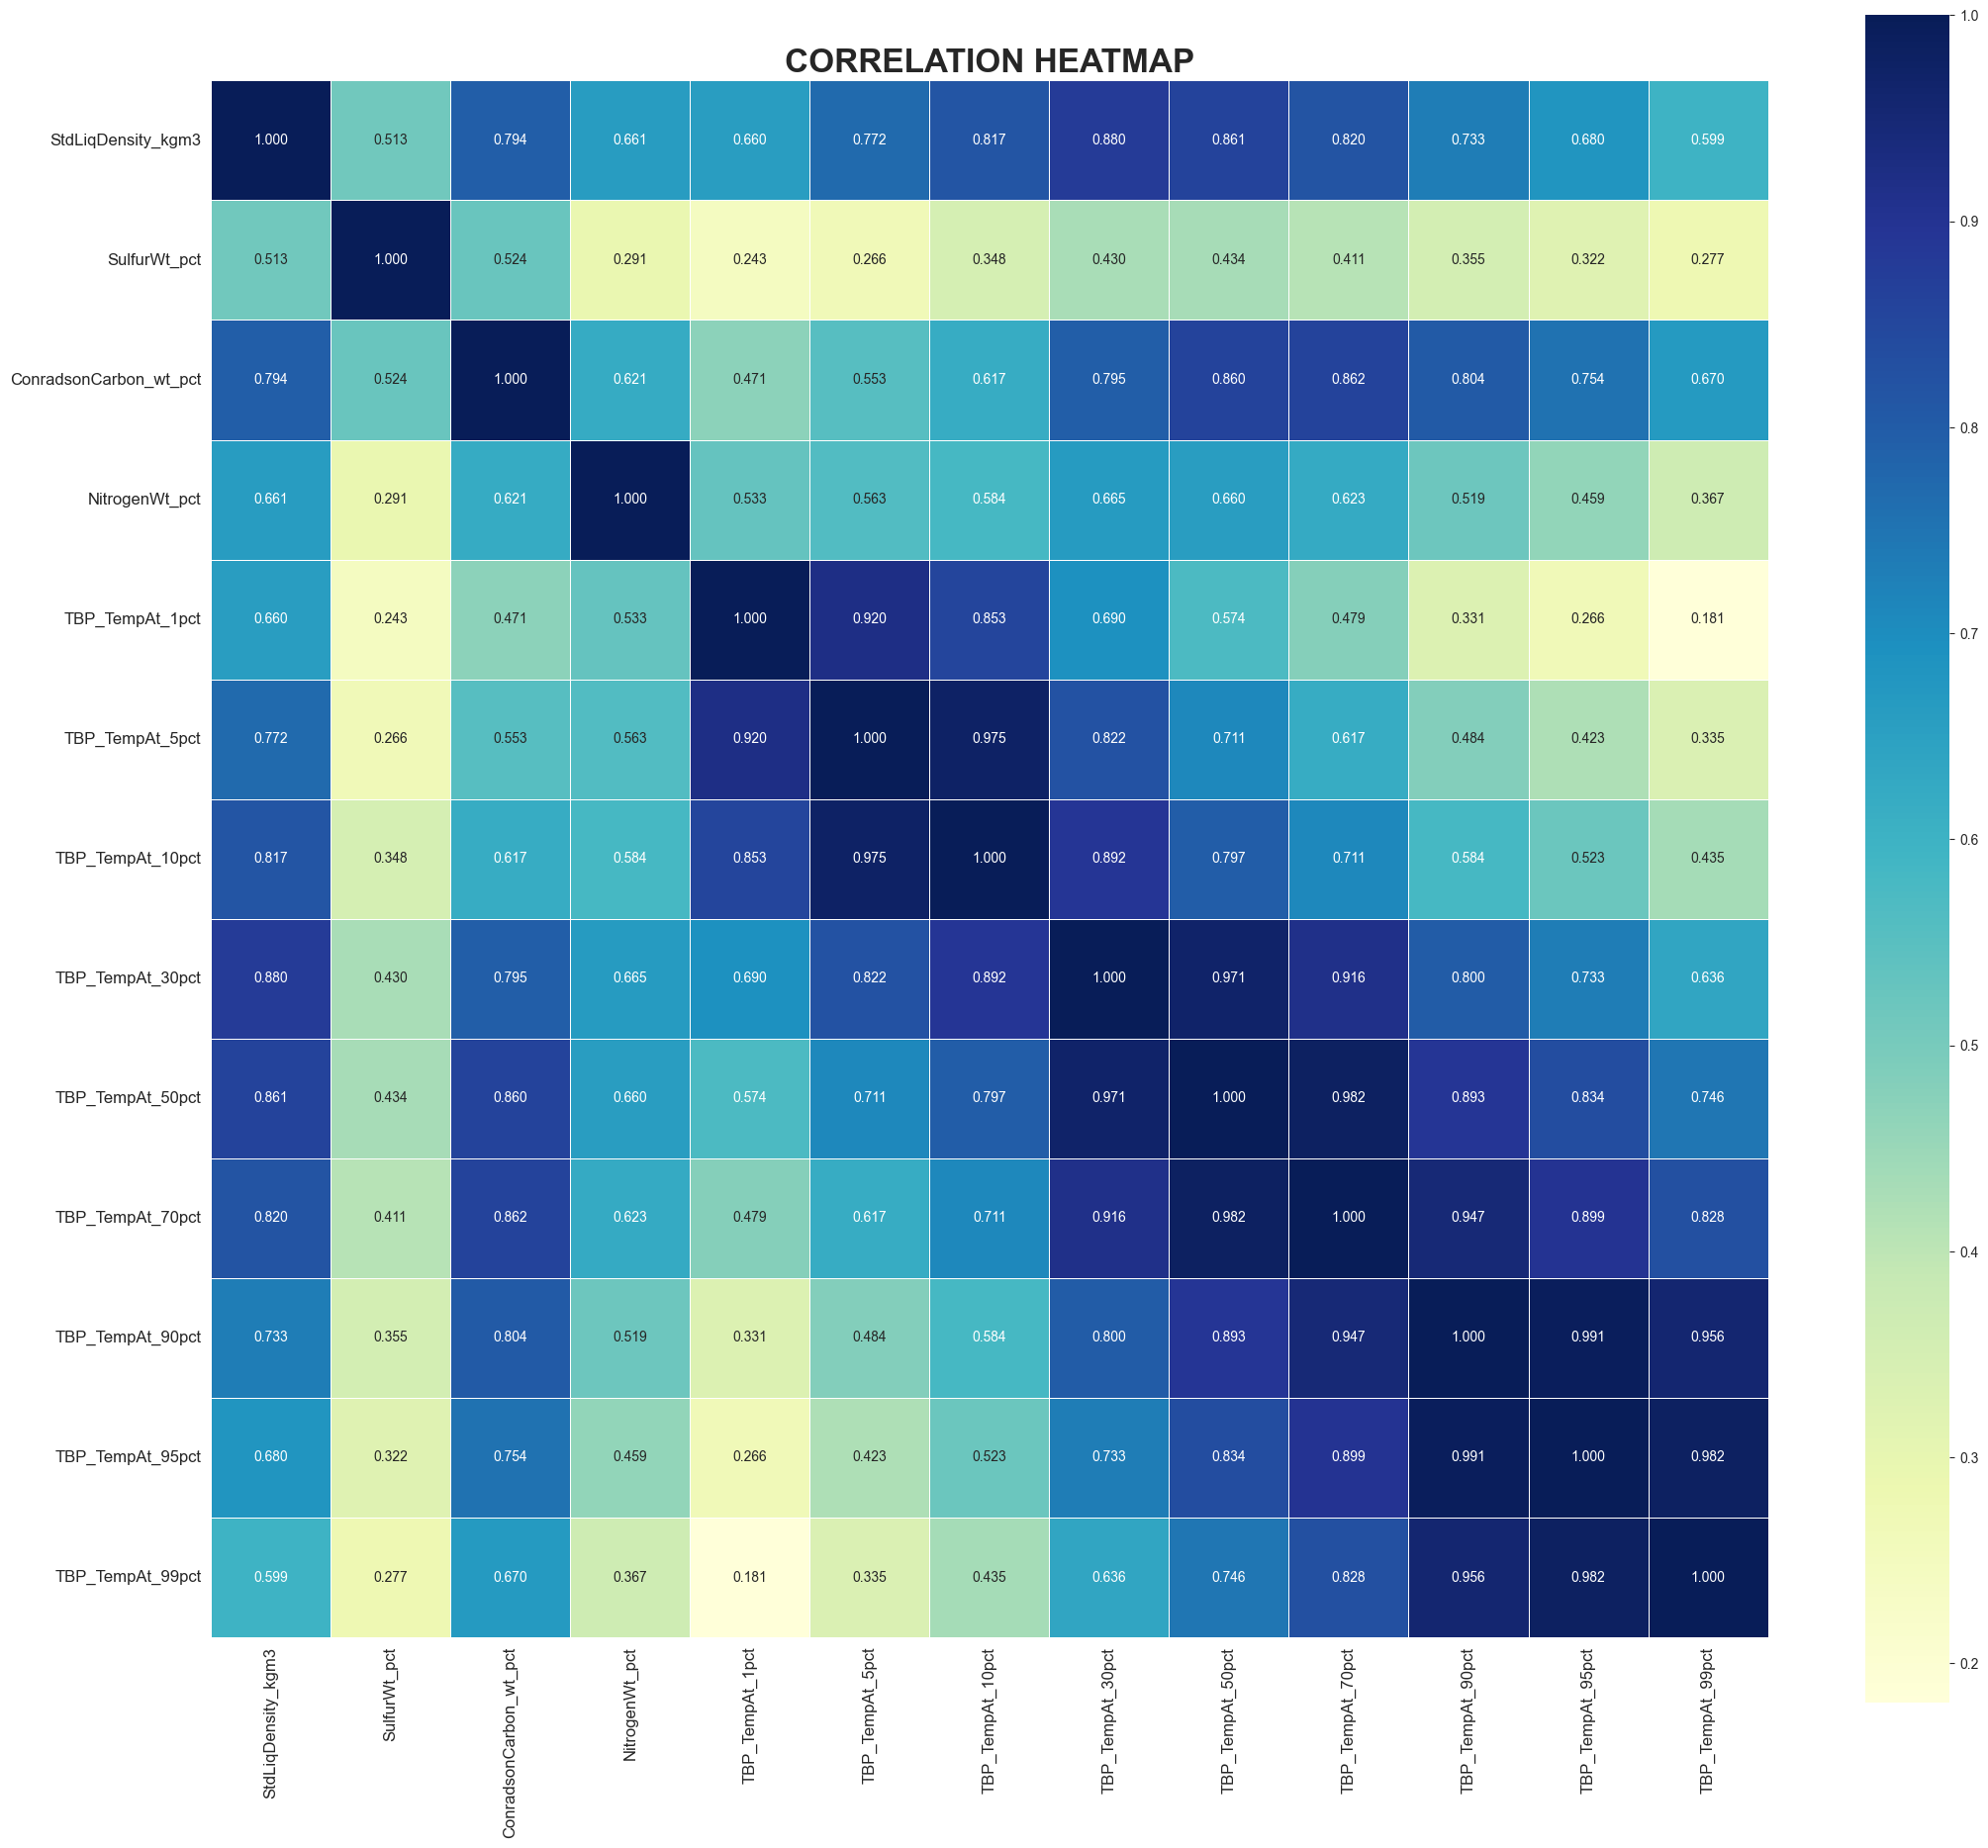

In [61]:
variables = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct','TBP_TempAt_1pct', 'TBP_TempAt_5pct', 'TBP_TempAt_10pct', 
            'TBP_TempAt_30pct', 'TBP_TempAt_50pct', 'TBP_TempAt_70pct', 'TBP_TempAt_90pct', 'TBP_TempAt_95pct', 'TBP_TempAt_99pct']
#Correlation matrix
corr_matrix = df[variables].corr()

#Plot heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='YlGnBu', square=True, cbar_kws={"shrink": 0.8}, linewidths=0.7)

plt.title('CORRELATION HEATMAP', fontsize=24, fontweight='bold', y=1)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


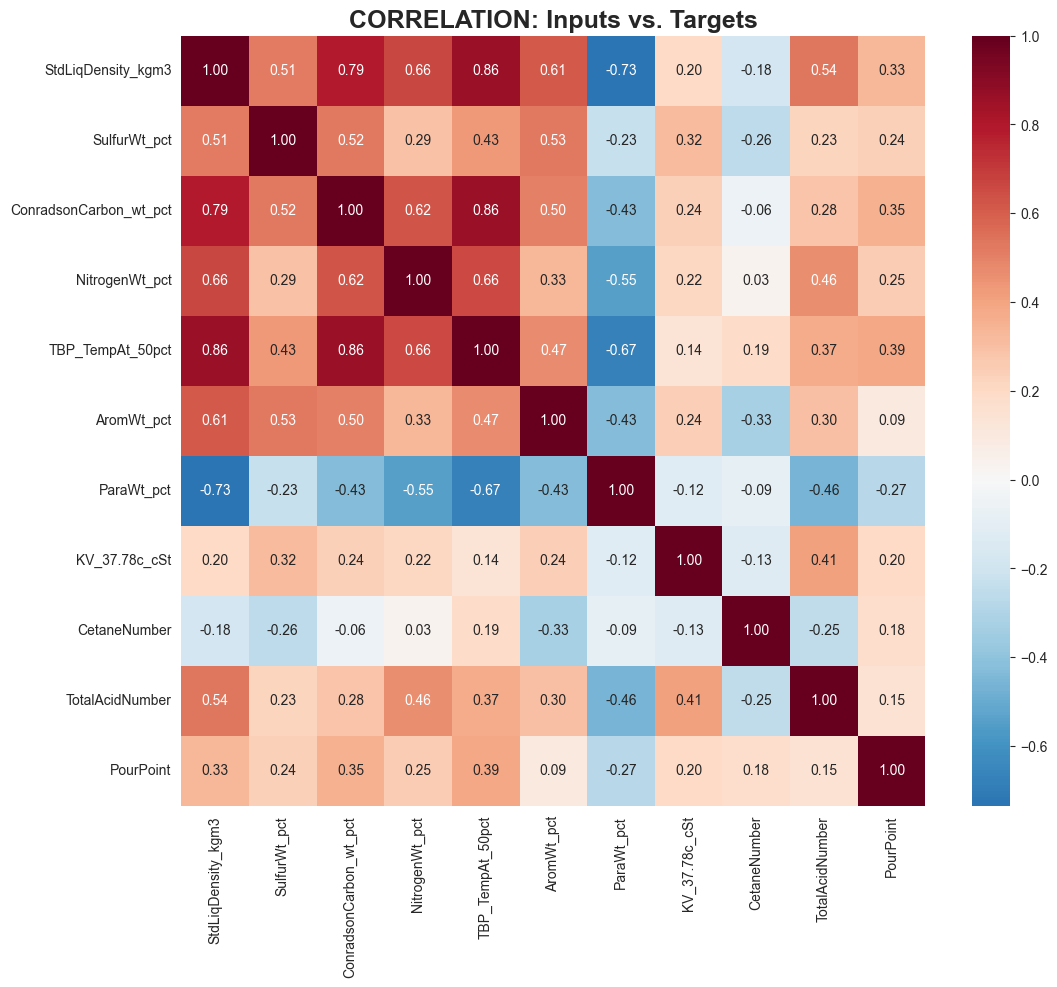

In [62]:
#Input vs Output Correlation
inputs = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct', 'TBP_TempAt_50pct']
targets = ['AromWt_pct', 'ParaWt_pct', 'KV_37.78c_cSt', 'CetaneNumber', 'TotalAcidNumber', 'PourPoint']

corr_matrix = df[inputs + targets].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.title('CORRELATION: Inputs vs. Targets', fontsize=18, fontweight='bold')
plt.show()